## Housing Price Prediction

### Reading and Understanding Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

In [2]:
# Read the data 
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Handling Missing Values

In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# Here thresh is for non-null values
# Dropping columns with >60% of null values 
df = df.dropna(thresh= (0.4*len(df)),axis = 1)

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [9]:
df.shape

(1460, 77)

In [10]:
df_nulls = df[df.columns[df.isnull().any()]]
df_nulls

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.00,BrkFace,196.00,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.00,RFn,TA,TA
1,80.00,NaN,0.00,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.00,RFn,TA,TA
2,68.00,BrkFace,162.00,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.00,RFn,TA,TA
3,60.00,NaN,0.00,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.00,Unf,TA,TA
4,84.00,BrkFace,350.00,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.00,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.00,NaN,0.00,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.00,RFn,TA,TA
1456,85.00,Stone,119.00,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.00,Unf,TA,TA
1457,66.00,NaN,0.00,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.00,RFn,TA,TA
1458,68.00,NaN,0.00,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.00,Unf,TA,TA


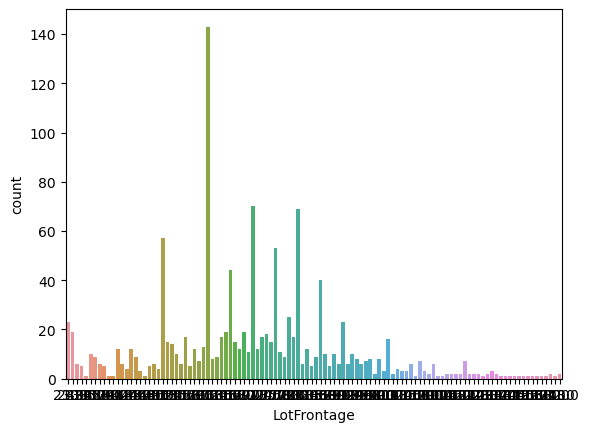

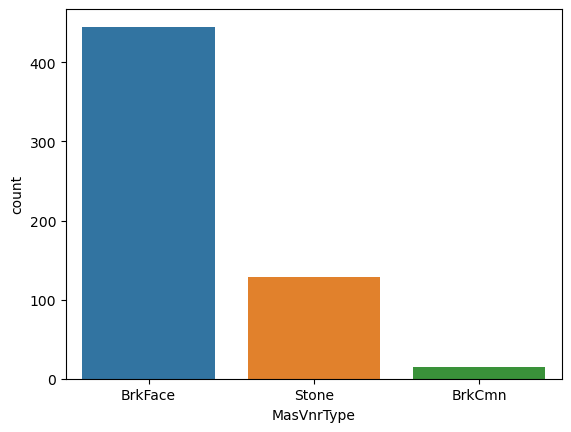

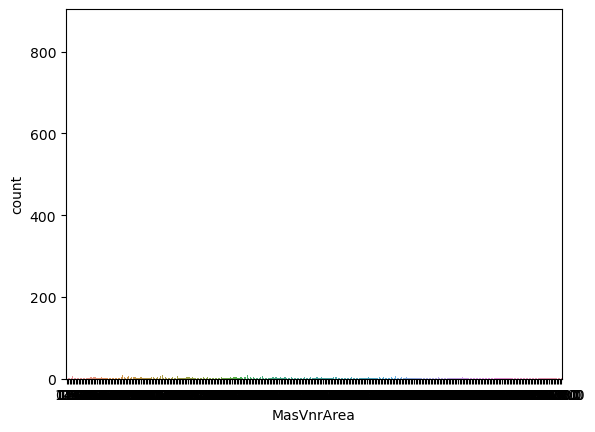

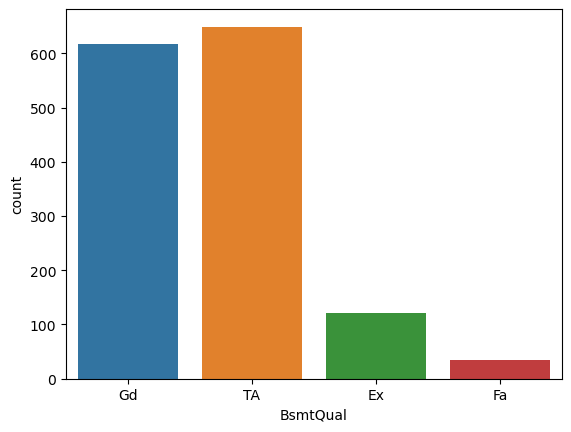

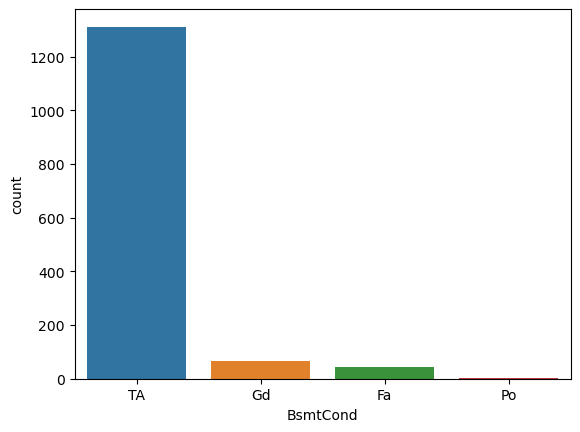

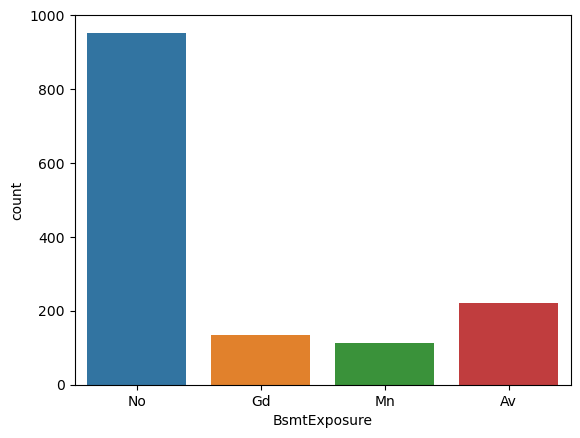

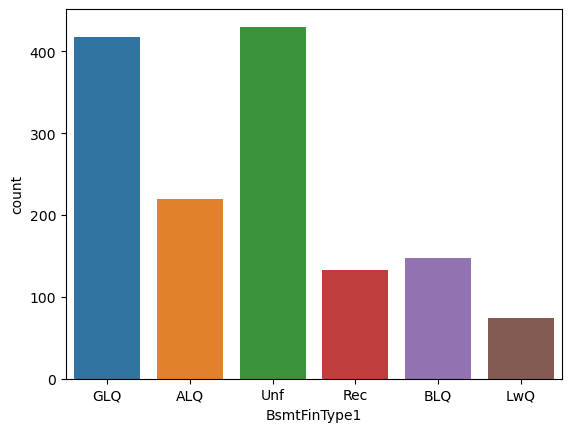

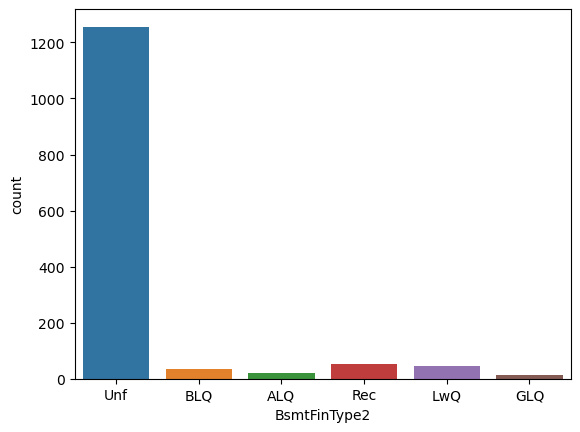

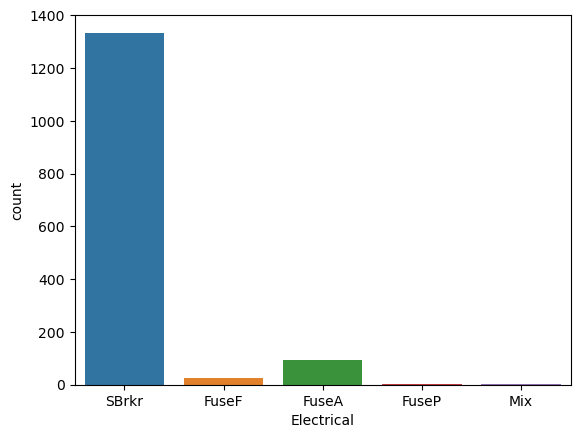

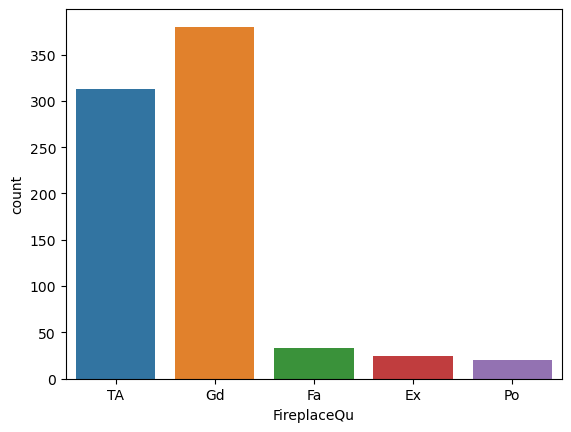

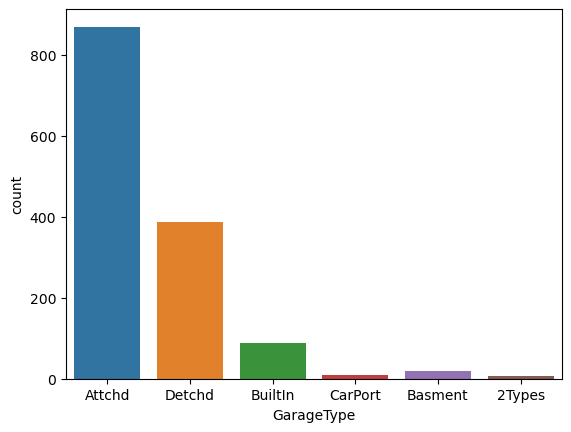

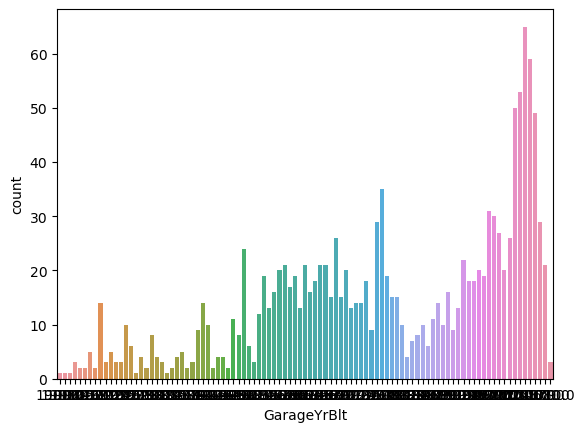

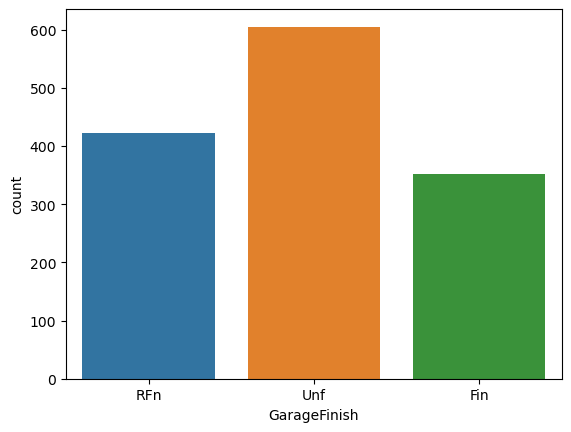

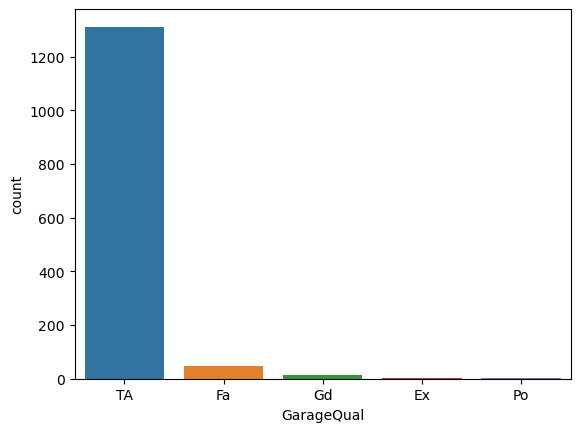

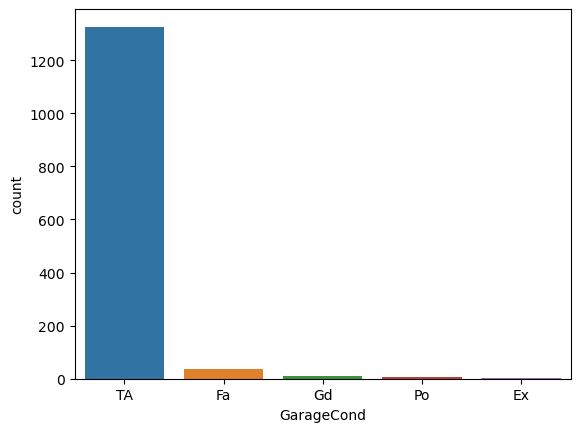

In [11]:
for i in df_nulls.columns:
    sns.countplot(x=df_nulls[i])
    plt.show()   

In [12]:
df_nulls.columns

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [13]:
df['MasVnrType'].fillna('None', inplace=True)
df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)
df['GarageType'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)

In [14]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [15]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

### Handling Unique/single values in entire column

In [16]:
unique_columns={}
for i in df.columns:
    unique = df[i].unique()
    count = unique.size
    unique_columns[i]=count
unique_columns

{'Id': 1460,
 'MSSubClass': 15,
 'MSZoning': 5,
 'LotFrontage': 110,
 'LotArea': 1073,
 'Street': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'OverallQual': 10,
 'OverallCond': 9,
 'YearBuilt': 112,
 'YearRemodAdd': 61,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'MasVnrType': 4,
 'MasVnrArea': 327,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 5,
 'BsmtCond': 5,
 'BsmtExposure': 5,
 'BsmtFinType1': 7,
 'BsmtFinSF1': 637,
 'BsmtFinType2': 7,
 'BsmtFinSF2': 144,
 'BsmtUnfSF': 780,
 'TotalBsmtSF': 721,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 '1stFlrSF': 753,
 '2ndFlrSF': 417,
 'LowQualFinSF': 24,
 'GrLivArea': 861,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'KitchenQual': 4,
 'TotRmsAbvGrd': 12,
 'Functional

In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,69.86,10516.83,6.10,5.58,1971.27,1984.87,103.12,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.59,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,22.03,9981.26,1.38,1.11,30.20,20.65,180.73,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.00,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,60.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1962.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,79.00,11601.50,7.00,6.00,2000.00,2004.00,164.25,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2001.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


### Outlier

<Axes: xlabel='SalePrice'>

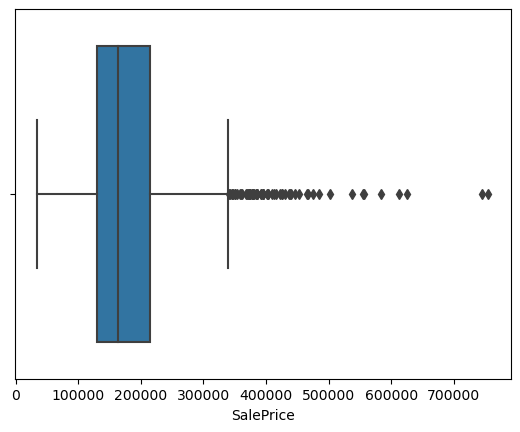

In [18]:
#Box plot for Sale Price
sns.boxplot(x=df['SalePrice'])

In [19]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

84025.0


In [20]:
#removing outliers in Sale Price
df = df[~((df['SalePrice'] < (Q1 - 1.5 * IQR)) |(df['SalePrice'] > (Q3 + 1.5 * IQR)))]
df.shape

(1399, 77)

<Axes: xlabel='SalePrice'>

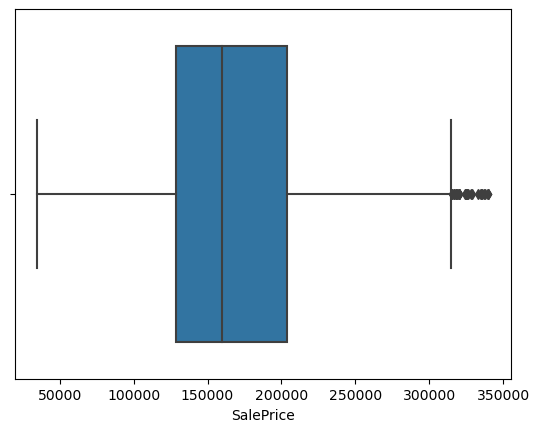

In [21]:
#Box plot for Sale Price
sns.boxplot(x=df['SalePrice'])

In [22]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00
mean,733.51,57.49,69.05,10155.28,5.98,5.59,1970.08,1984.06,89.73,417.33,47.48,559.46,1024.27,1132.25,336.48,5.69,1474.41,0.41,0.06,1.54,0.37,2.86,1.05,6.42,0.58,1977.61,1.72,458.82,89.62,44.89,22.38,3.23,14.63,2.48,45.39,6.31,2007.82,170237.13
std,422.81,42.80,21.52,8324.83,1.28,1.12,30.01,20.66,159.22,428.40,162.65,429.38,407.03,357.32,421.44,47.29,480.55,0.51,0.24,0.54,0.50,0.81,0.22,1.54,0.63,23.90,0.72,204.28,121.80,65.72,61.45,28.56,54.75,38.29,506.75,2.70,1.33,59230.13
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,367.50,20.00,60.00,7442.00,5.00,5.00,1953.00,1966.00,0.00,0.00,0.00,218.00,788.00,870.50,0.00,0.00,1119.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1962.00,1.00,312.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129000.00
50%,739.00,50.00,69.00,9317.00,6.00,5.00,1971.00,1992.00,0.00,370.00,0.00,476.00,973.00,1069.00,0.00,0.00,1437.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,471.00,0.00,22.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,159500.00
75%,1098.50,70.00,78.00,11316.50,7.00,6.00,1999.00,2003.00,143.00,686.00,0.00,807.00,1251.50,1346.50,720.00,0.00,1728.00,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2000.00,2.00,573.00,165.00,64.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,203500.00
max,1460.00,190.00,313.00,164660.00,10.00,9.00,2009.00,2010.00,1600.00,5644.00,1474.00,2042.00,6110.00,4692.00,1818.00,528.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,736.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,340000.00


### Univariate Analysis

In [23]:
#Categorical Columns
df_cat = df.select_dtypes(include = ['object'])
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [24]:
#Continuous/Numercial columns
df_cont = df.select_dtypes(include = ['int64','float64'])
df_cont.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.00,8450,7,5,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.00,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.00,9600,6,8,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.00,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.00,11250,7,5,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.00,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.00,9550,7,5,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.00,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.00,14260,8,5,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.00,3,836,192,84,0,0,0,0,0,12,2008,250000


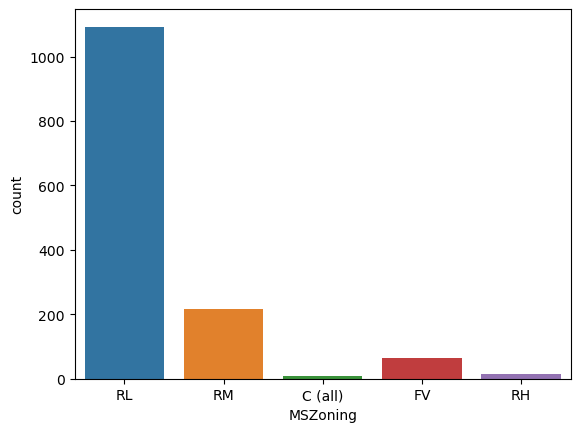

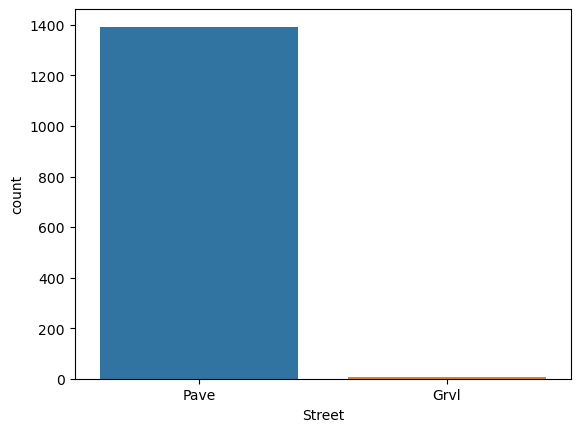

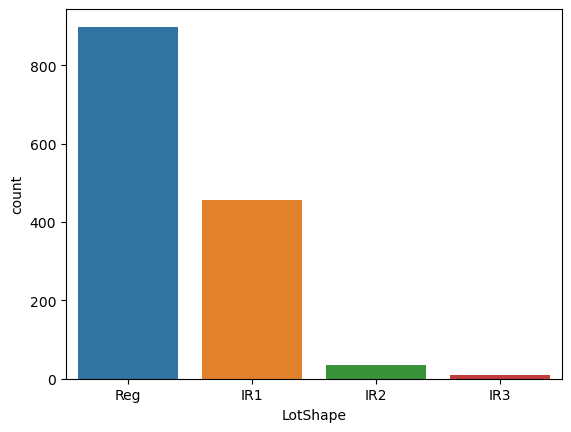

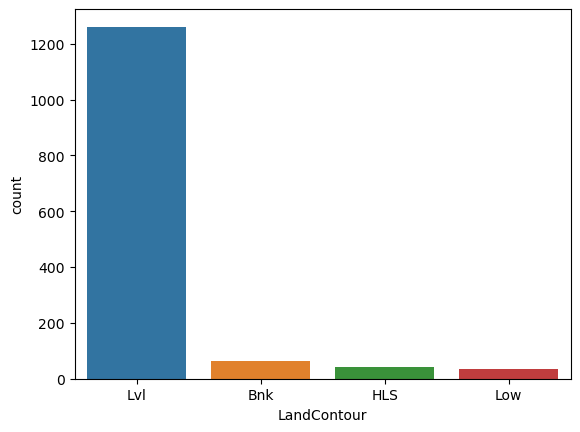

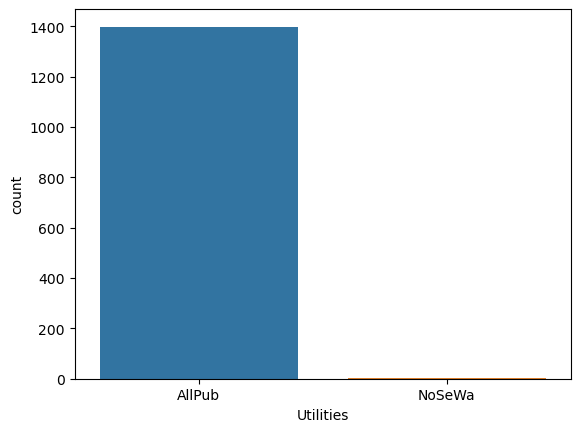

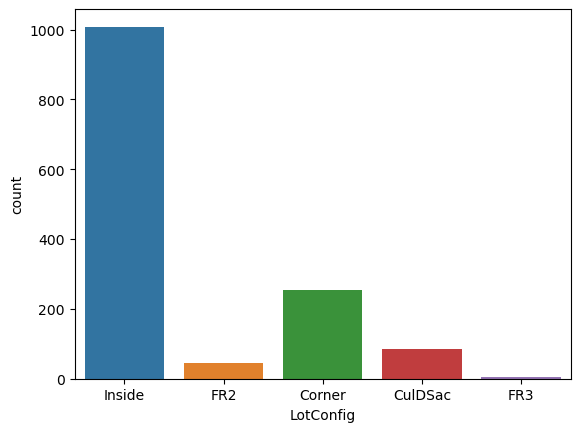

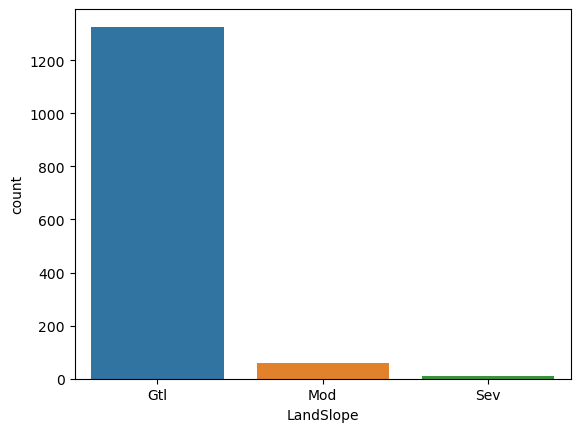

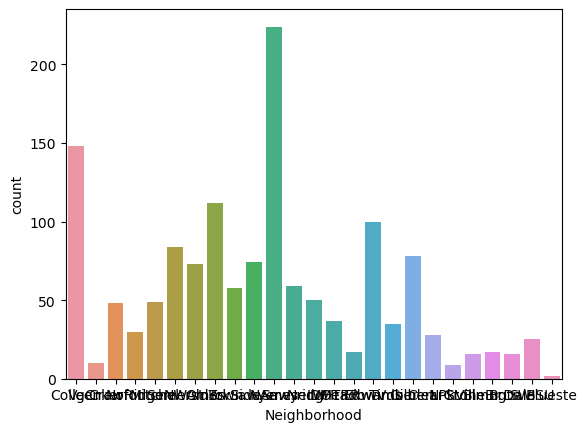

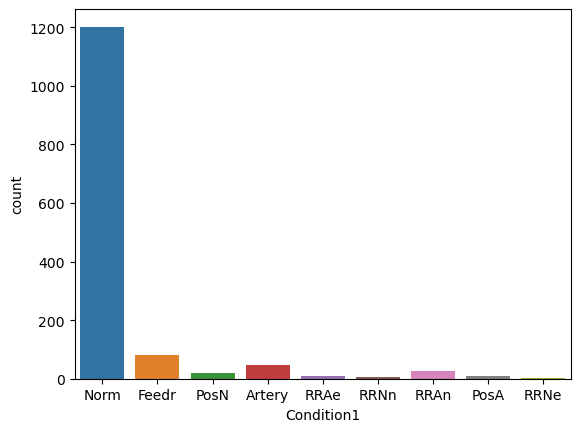

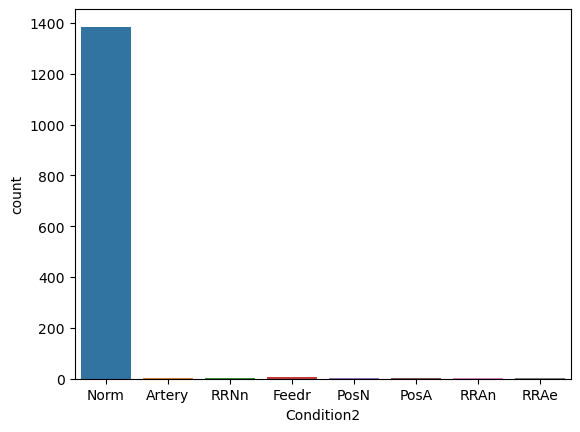

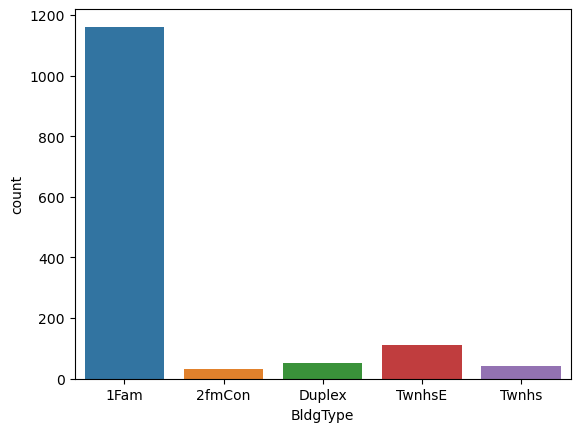

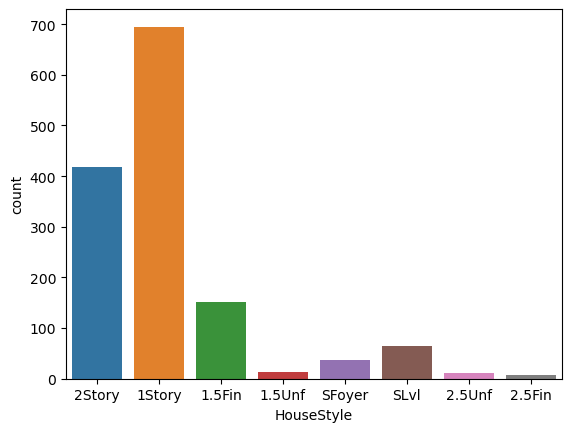

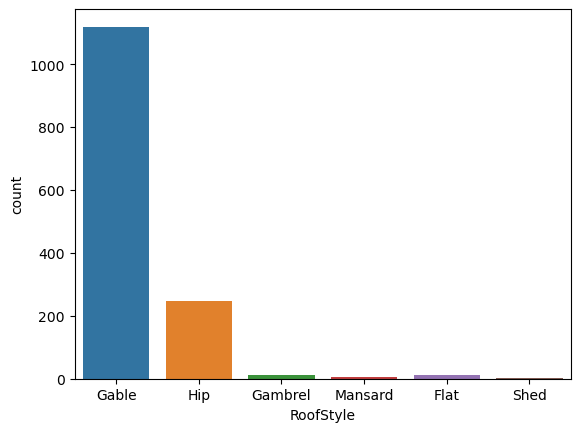

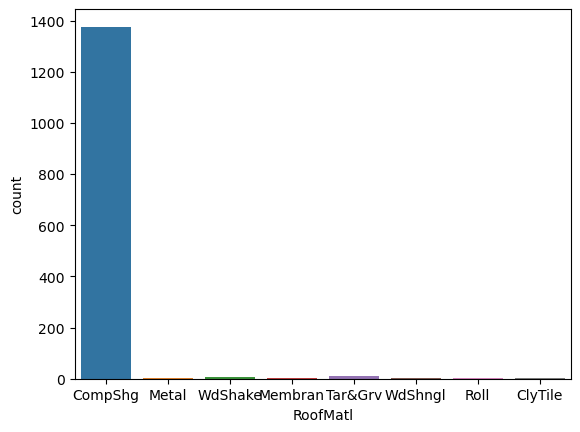

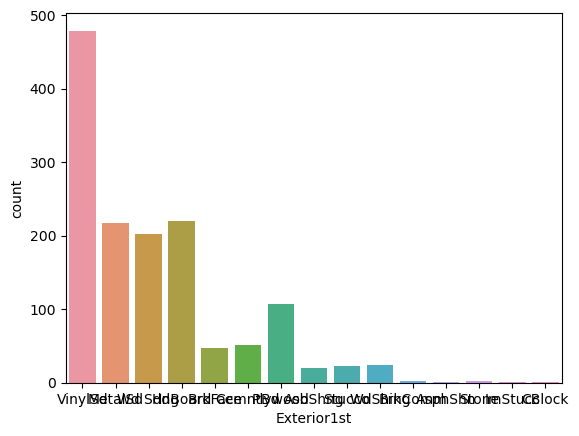

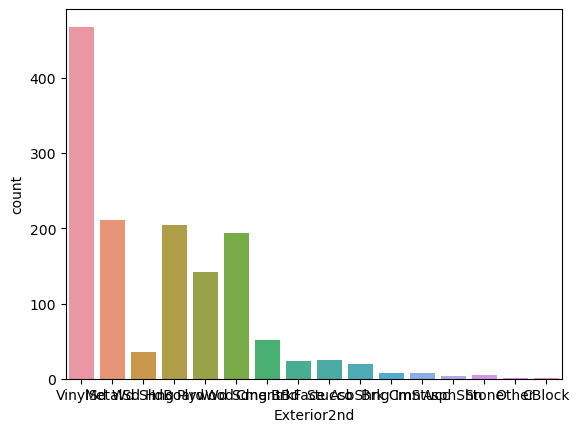

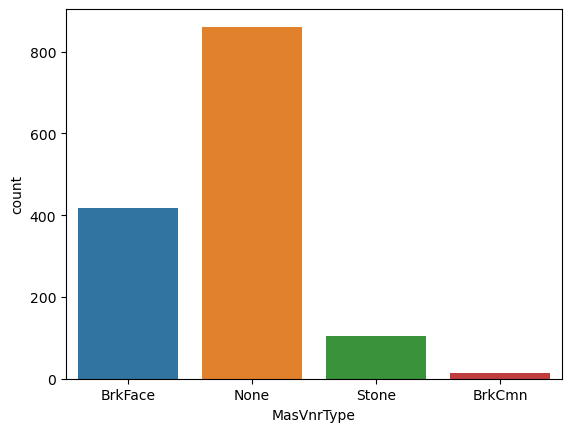

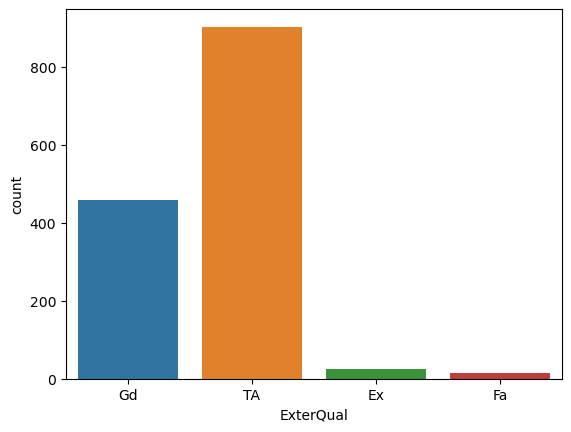

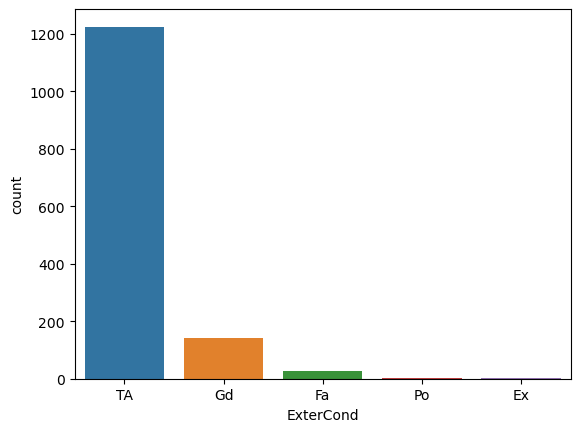

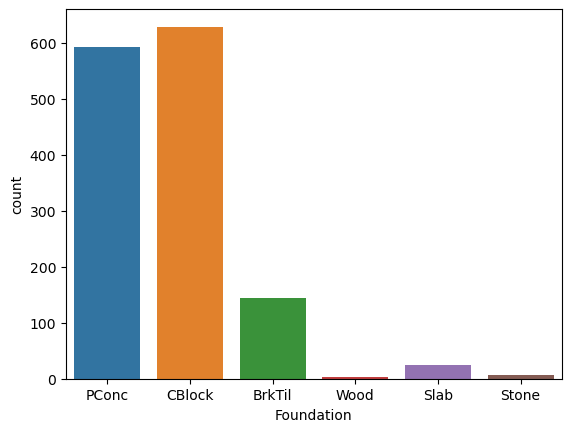

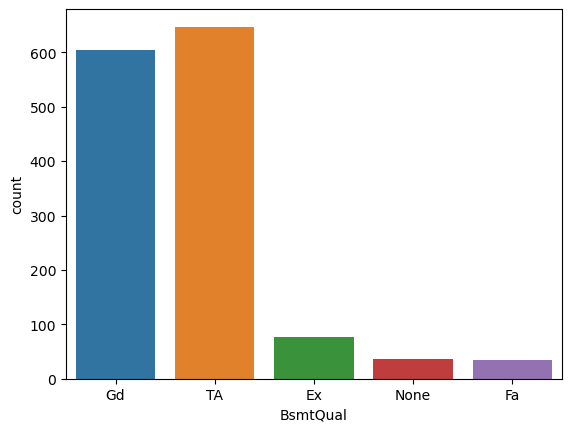

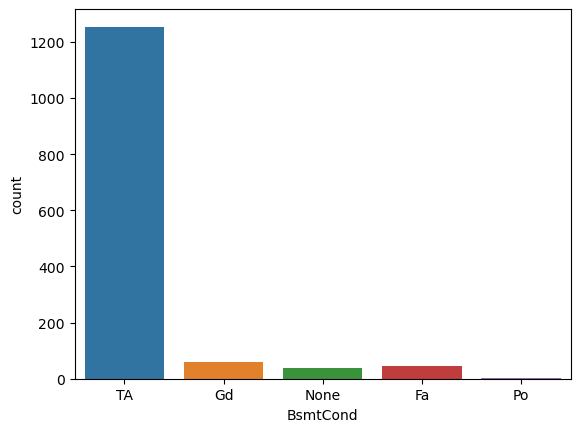

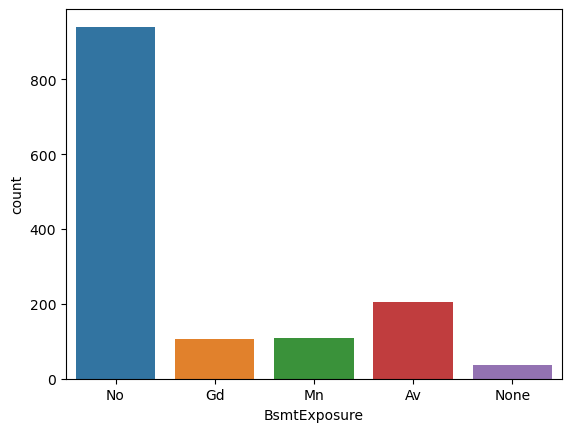

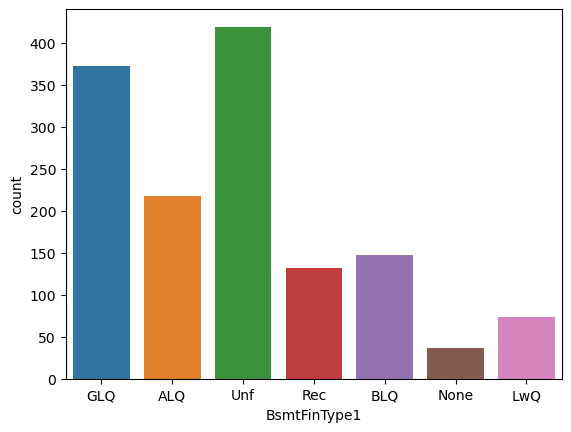

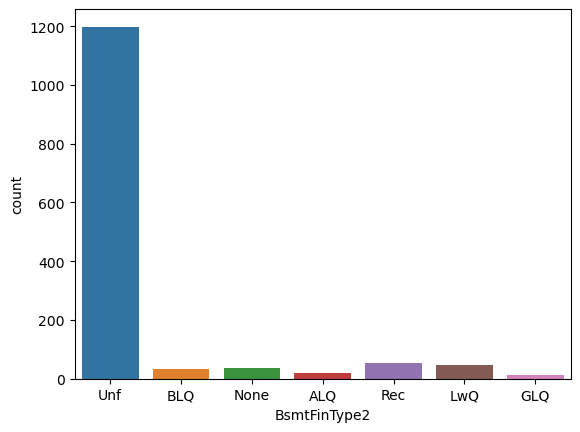

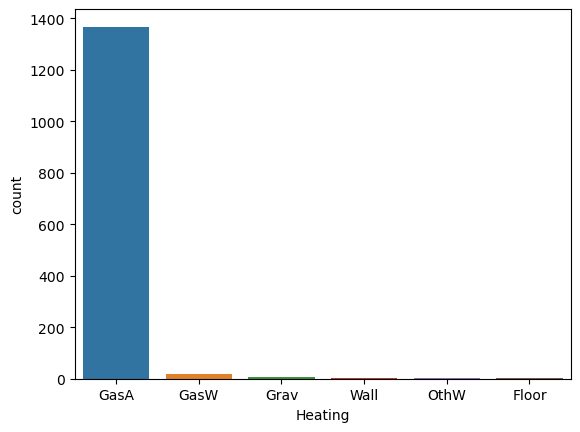

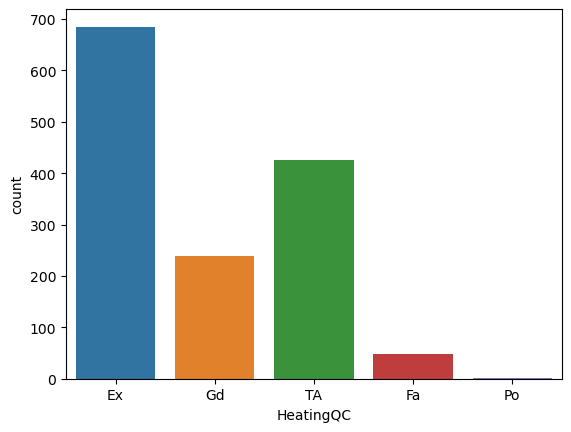

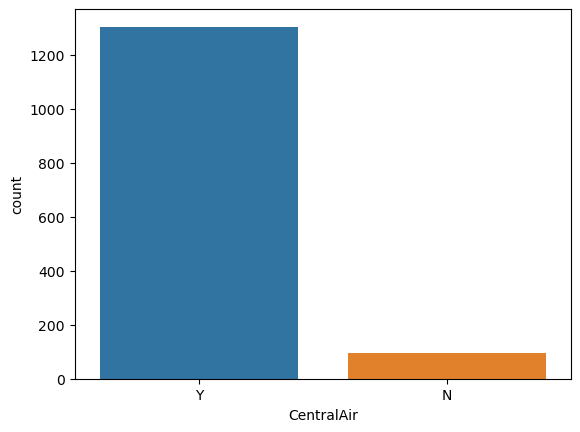

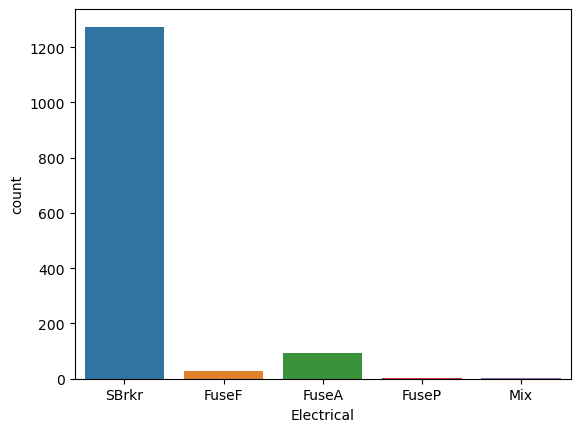

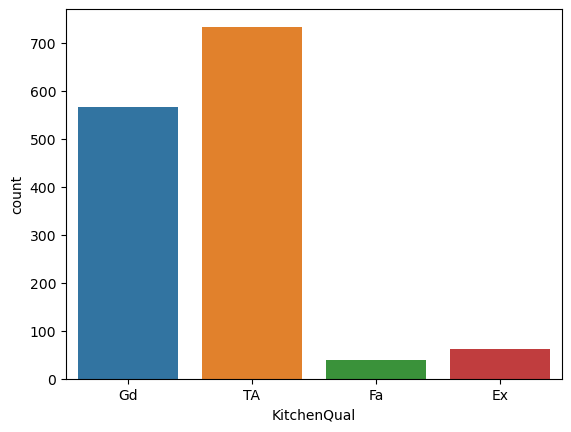

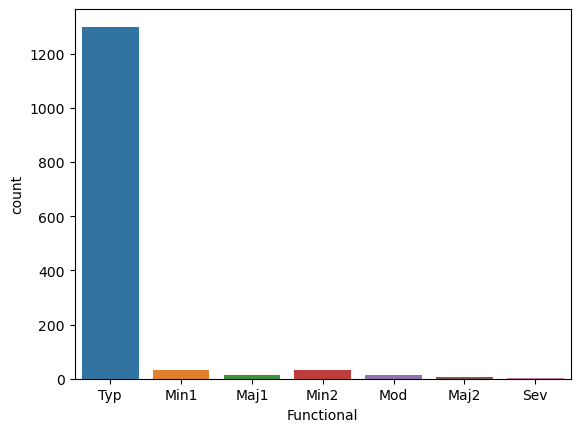

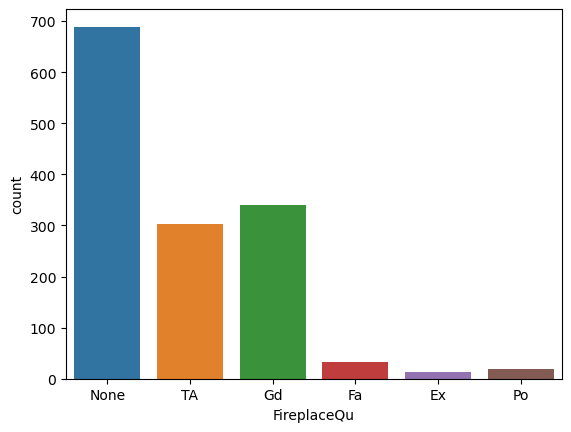

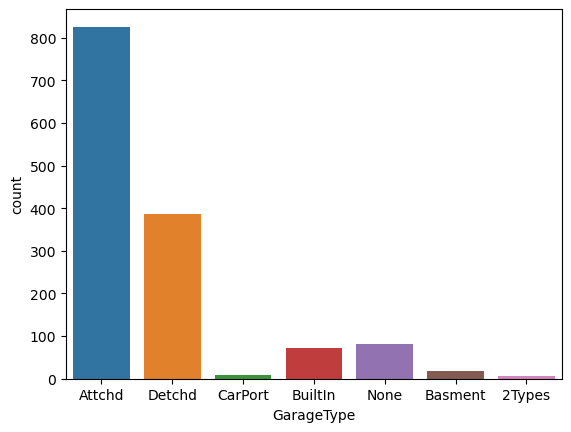

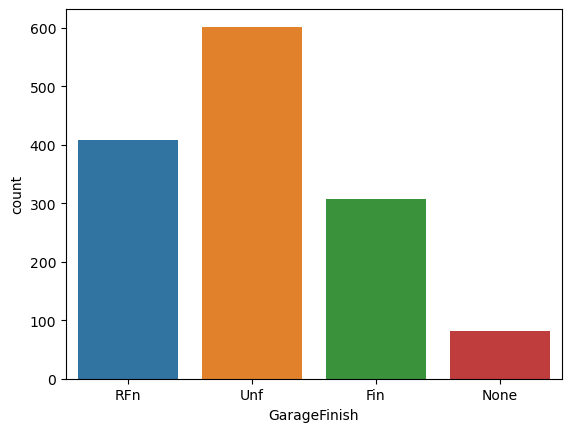

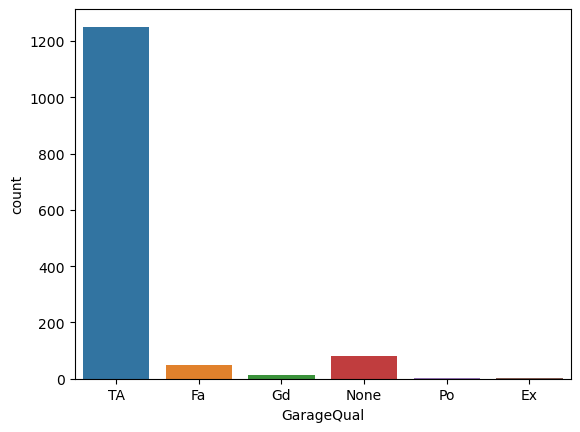

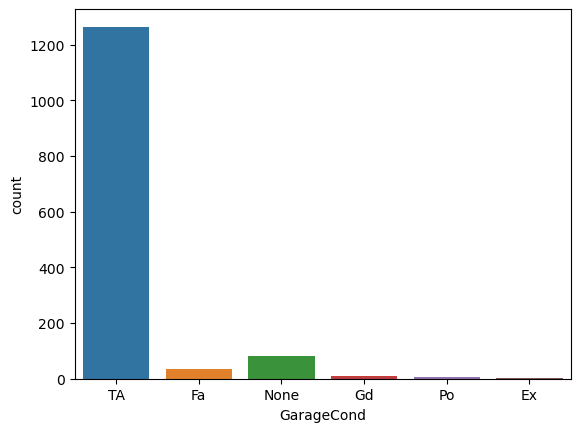

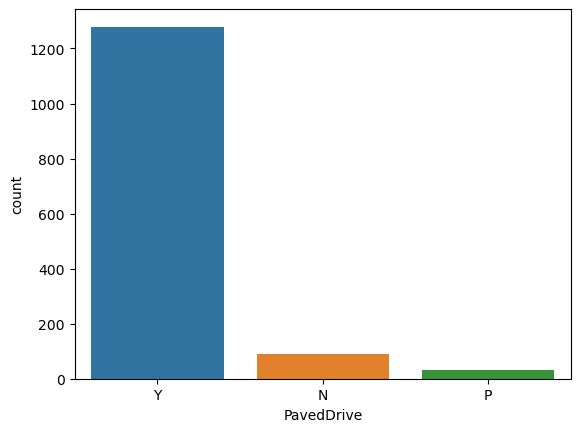

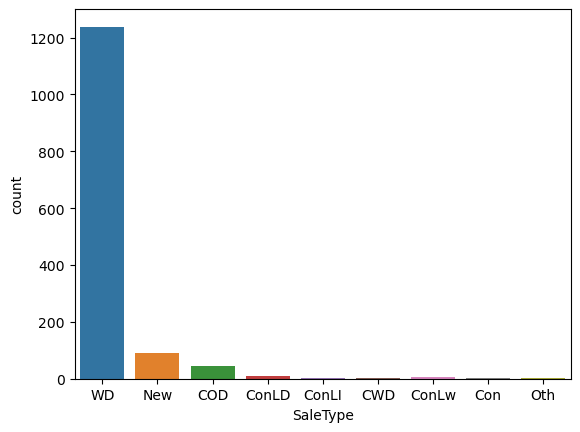

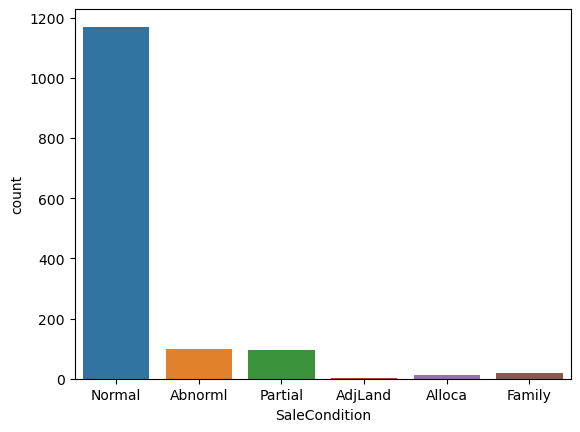

In [25]:
for i in df_cat.columns:
    sns.countplot(x = df_cat[i])
    plt.show()

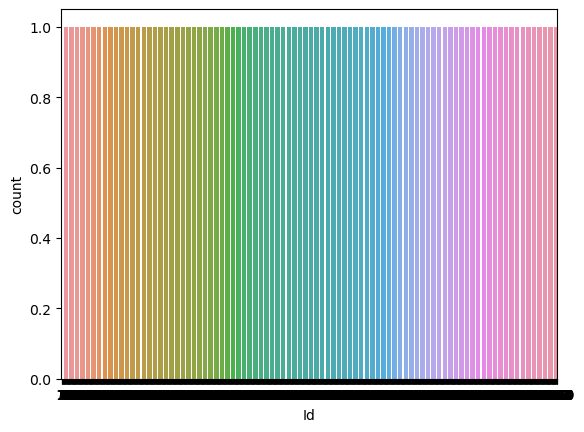

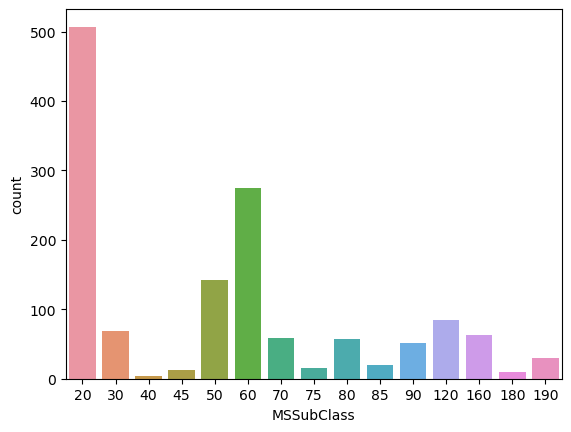

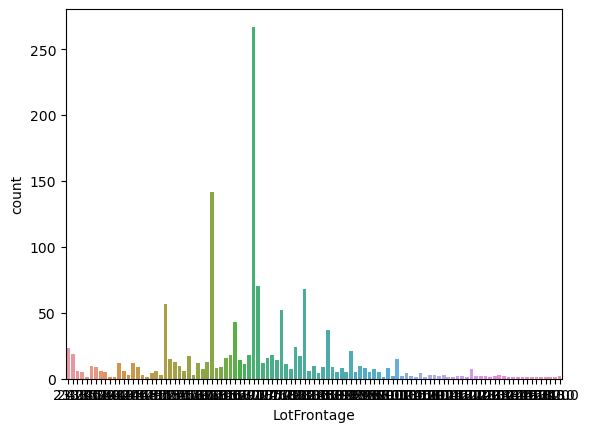

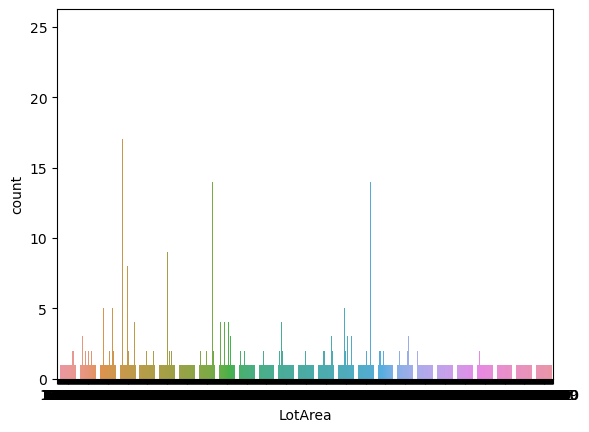

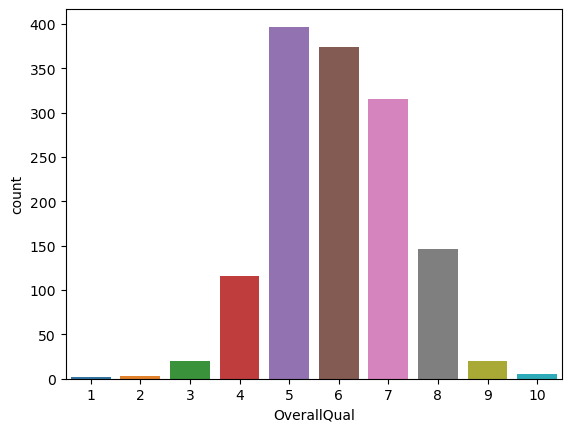

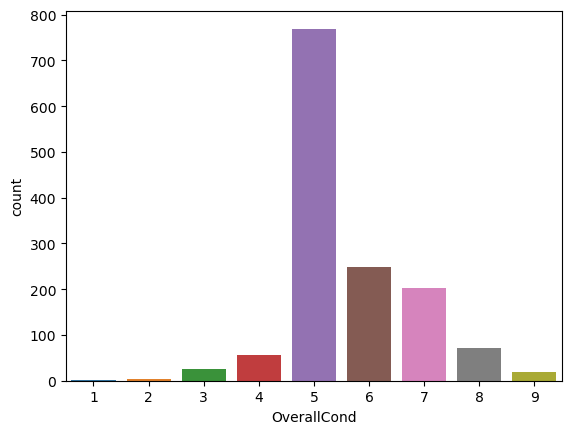

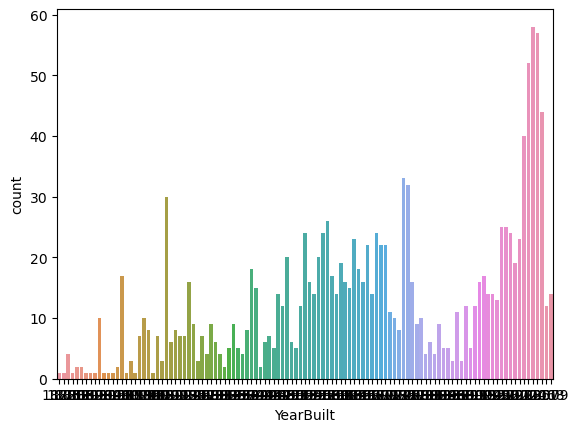

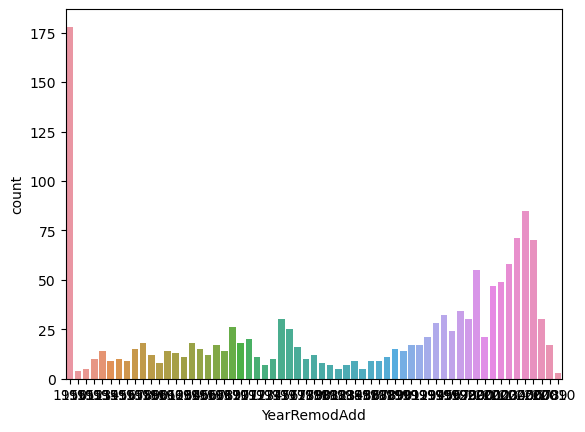

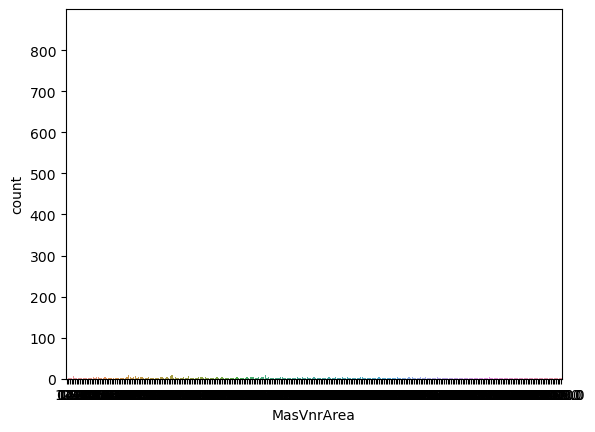

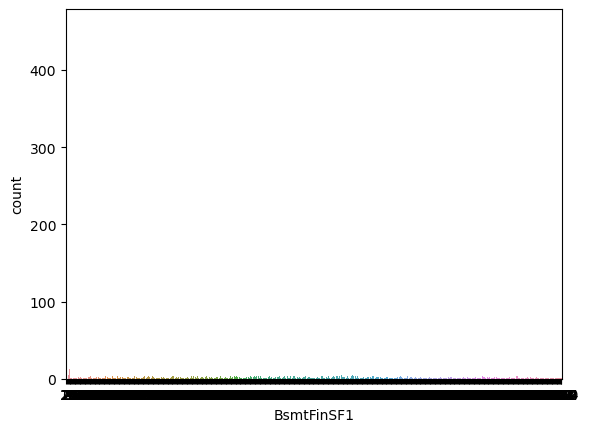

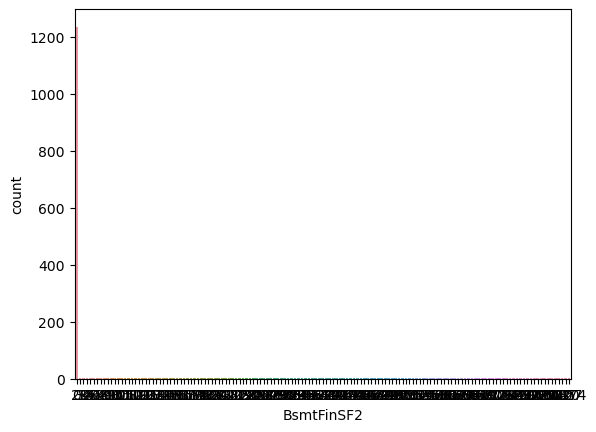

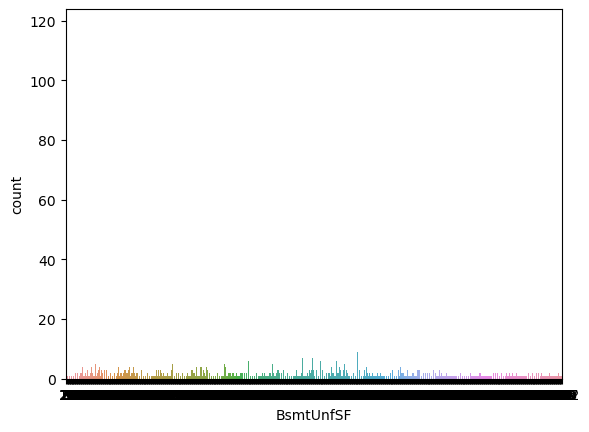

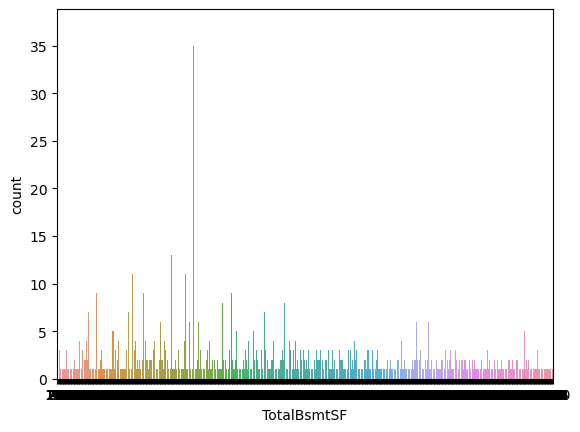

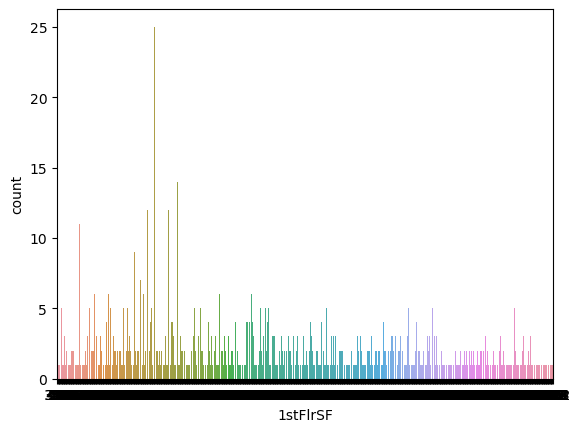

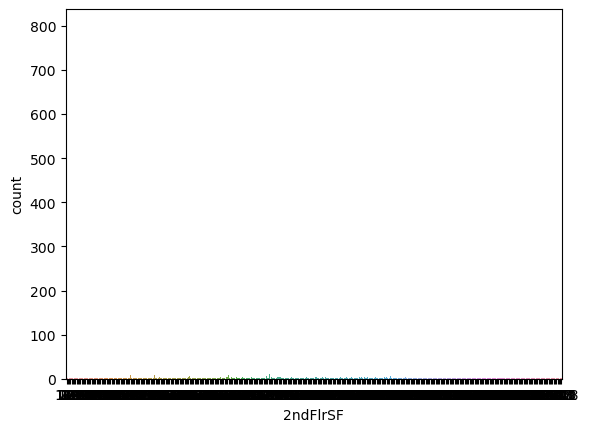

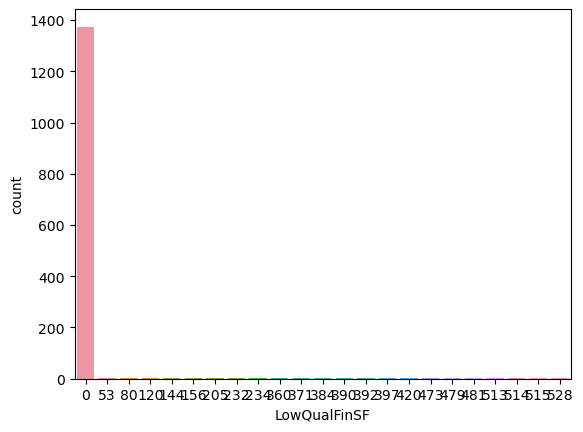

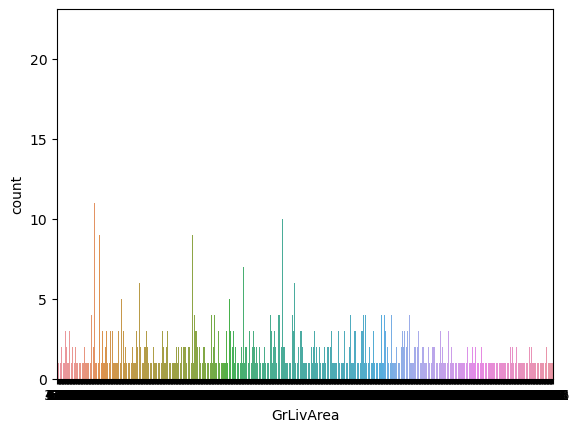

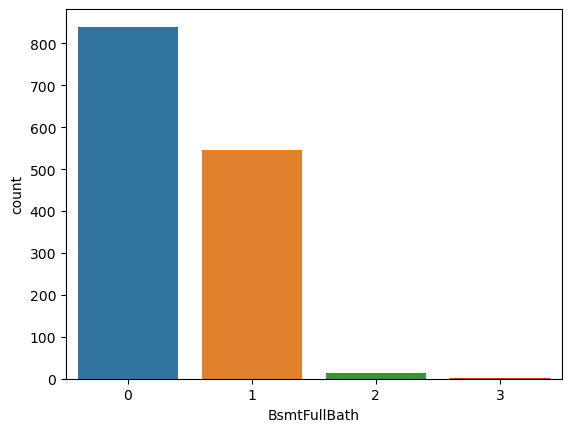

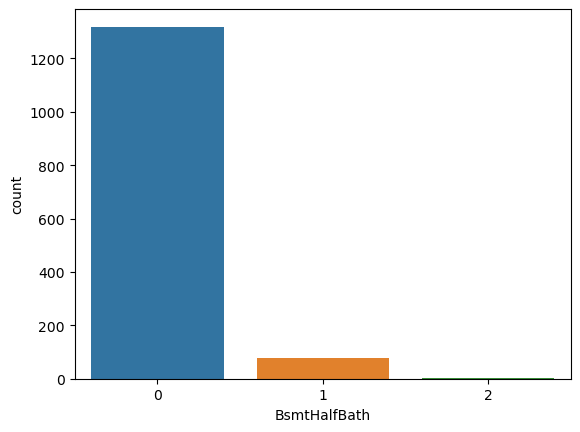

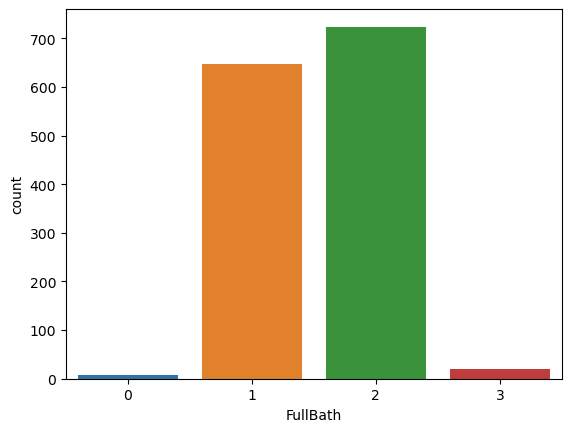

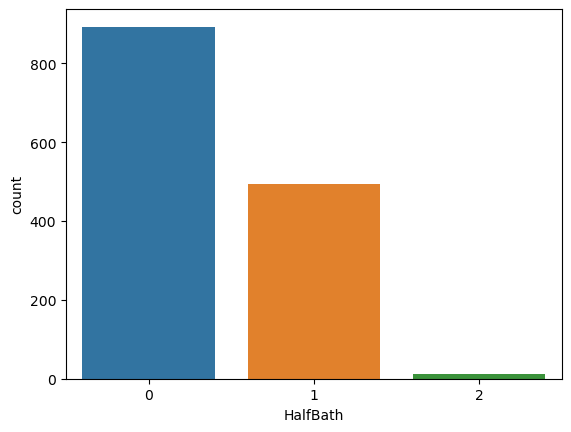

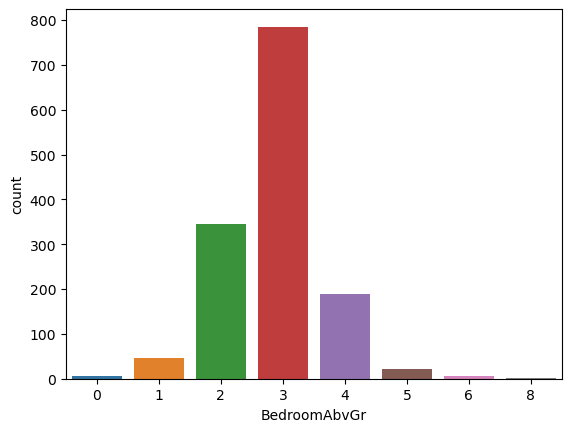

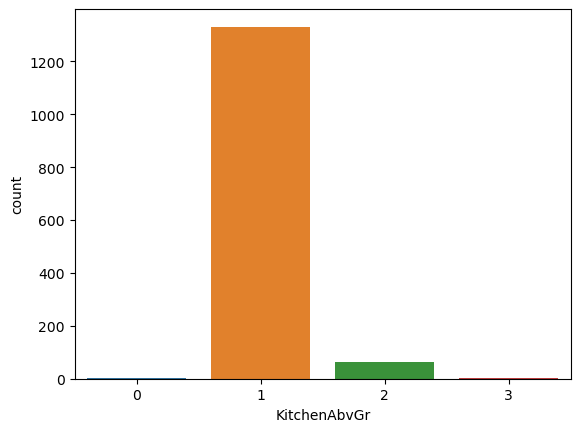

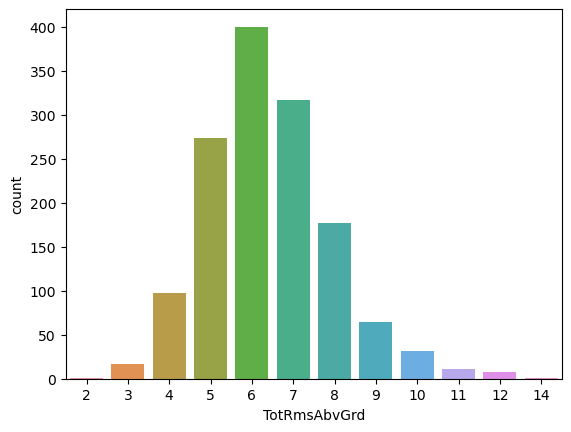

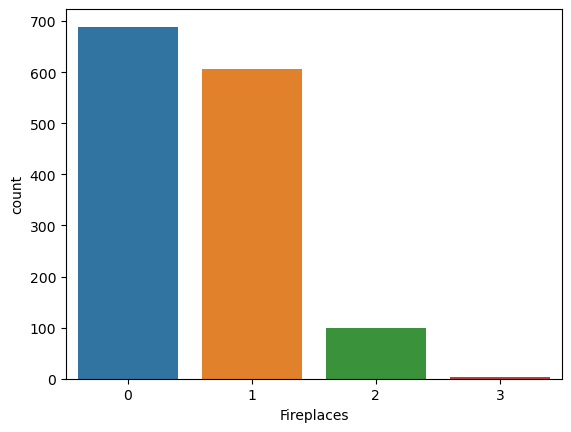

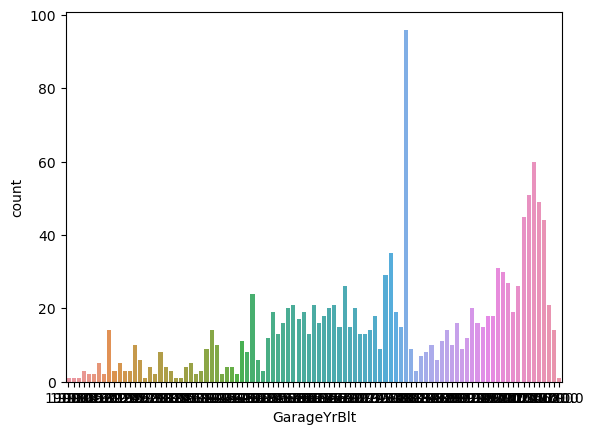

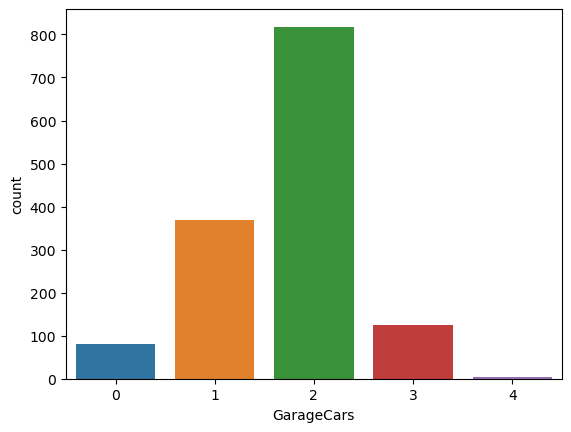

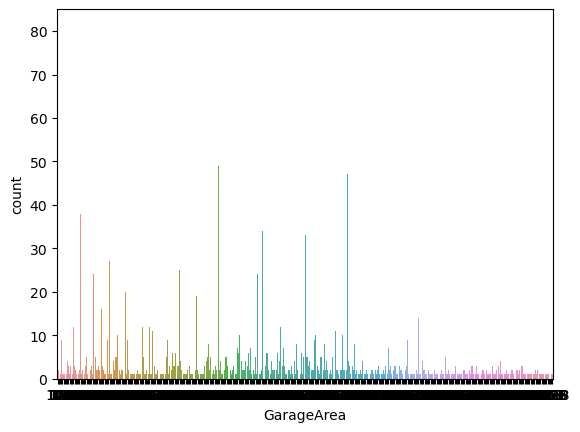

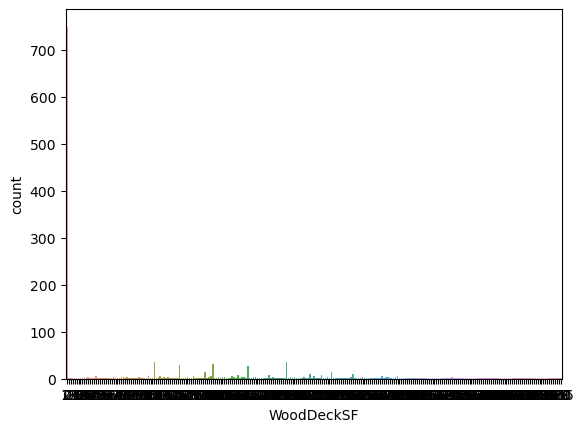

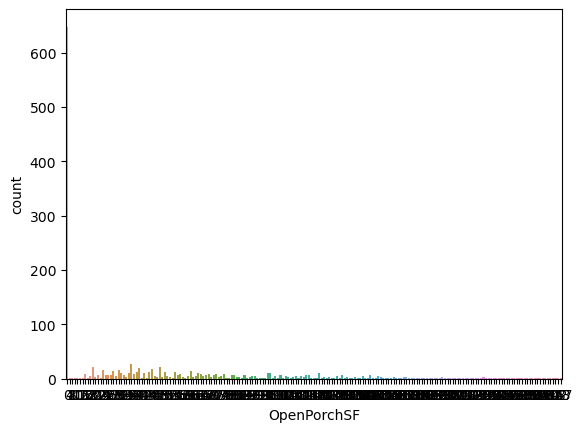

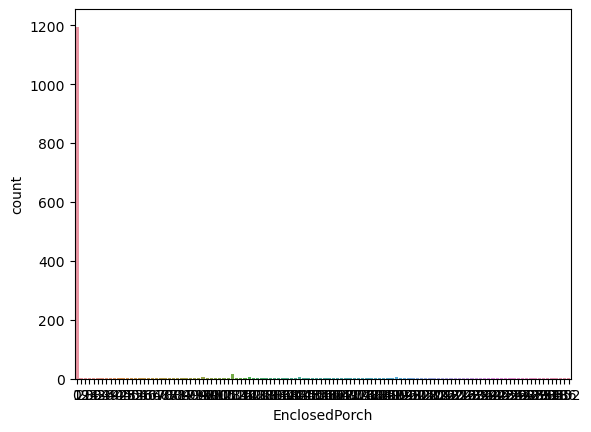

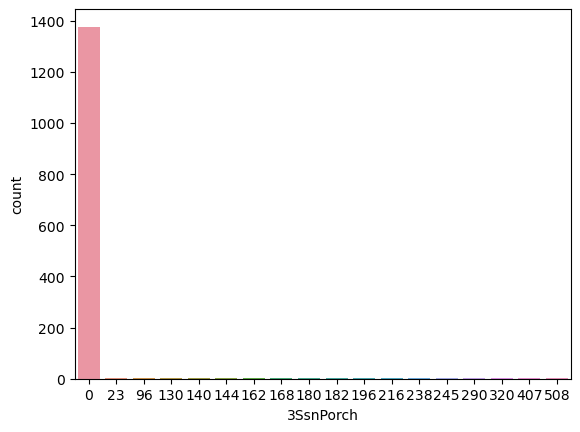

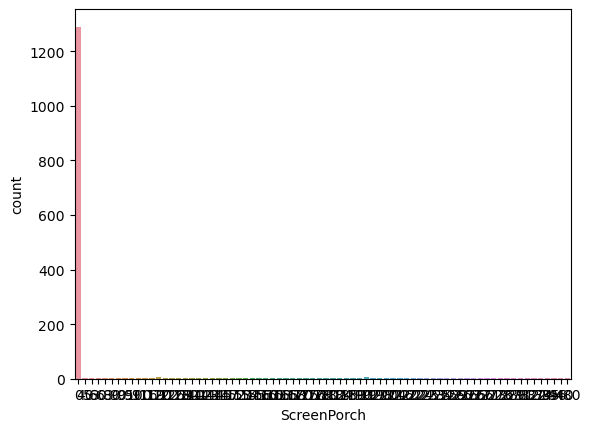

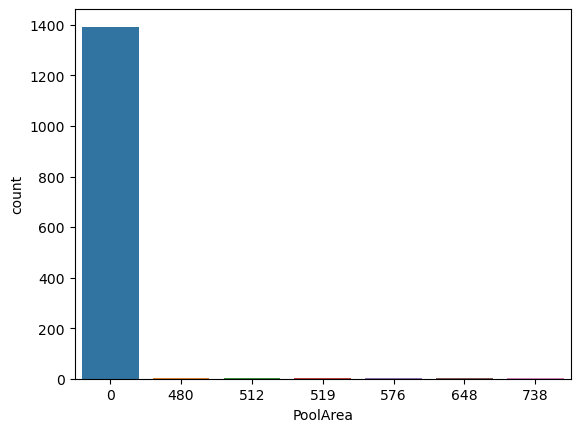

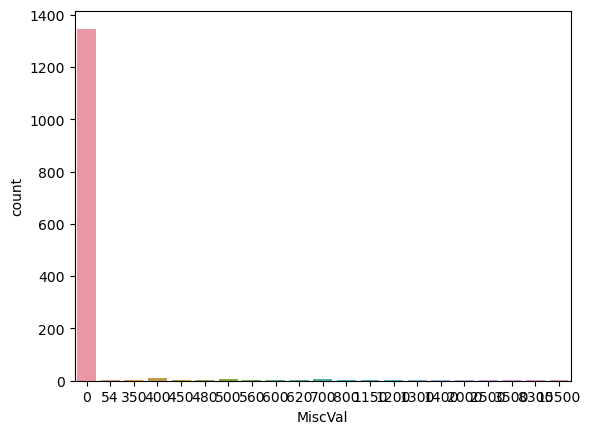

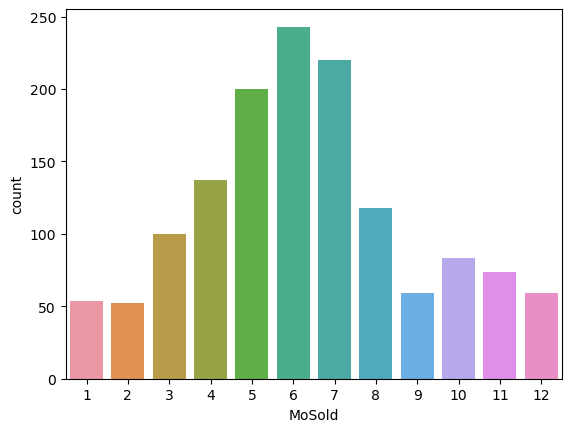

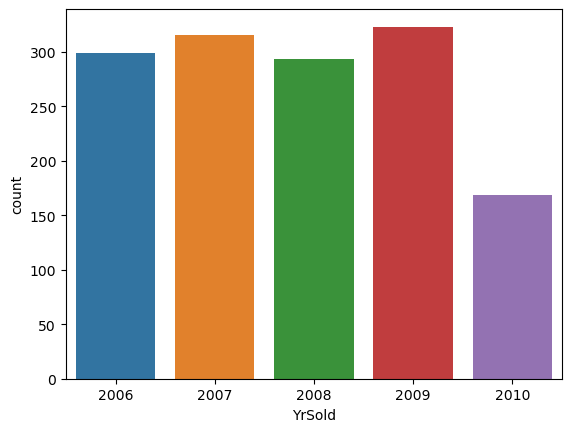

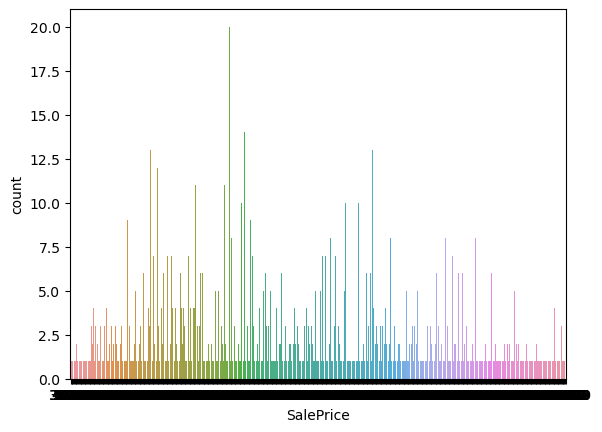

In [26]:
for i in df_cont.columns:
    sns.countplot(x = df_cont[i])
    plt.show()

In [27]:
unwanted_Cols = ['Street','Utilities','Condition2','RoofMatl','Heating','MiscVal', 'PoolArea', 'ScreenPorch','3SsnPorch', 'LowQualFinSF','BsmtHalfBath','KitchenAbvGr', 'LandSlope']
df.drop(unwanted_Cols,axis=1, inplace=True)

In [28]:
df.drop(columns='Id', inplace=True)

In [29]:
df.shape

(1399, 63)

In [30]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00,1399.00
mean,57.49,69.05,10155.28,5.98,5.59,1970.08,1984.06,89.73,417.33,47.48,559.46,1024.27,1132.25,336.48,1474.41,0.41,1.54,0.37,2.86,6.42,0.58,1977.61,1.72,458.82,89.62,44.89,22.38,6.31,2007.82,170237.13
std,42.80,21.52,8324.83,1.28,1.12,30.01,20.66,159.22,428.40,162.65,429.38,407.03,357.32,421.44,480.55,0.51,0.54,0.50,0.81,1.54,0.63,23.90,0.72,204.28,121.80,65.72,61.45,2.70,1.33,59230.13
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,20.00,60.00,7442.00,5.00,5.00,1953.00,1966.00,0.00,0.00,0.00,218.00,788.00,870.50,0.00,1119.00,0.00,1.00,0.00,2.00,5.00,0.00,1962.00,1.00,312.00,0.00,0.00,0.00,5.00,2007.00,129000.00
50%,50.00,69.00,9317.00,6.00,5.00,1971.00,1992.00,0.00,370.00,0.00,476.00,973.00,1069.00,0.00,1437.00,0.00,2.00,0.00,3.00,6.00,1.00,1980.00,2.00,471.00,0.00,22.00,0.00,6.00,2008.00,159500.00
75%,70.00,78.00,11316.50,7.00,6.00,1999.00,2003.00,143.00,686.00,0.00,807.00,1251.50,1346.50,720.00,1728.00,1.00,2.00,1.00,3.00,7.00,1.00,2000.00,2.00,573.00,165.00,64.00,0.00,8.00,2009.00,203500.00
max,190.00,313.00,164660.00,10.00,9.00,2009.00,2010.00,1600.00,5644.00,1474.00,2042.00,6110.00,4692.00,1818.00,5642.00,3.00,3.00,2.00,8.00,14.00,3.00,2010.00,4.00,1418.00,736.00,547.00,552.00,12.00,2010.00,340000.00


In [31]:
year_now = 2024
df['Built_age'] = year_now - df['YearBuilt']
df['RemodAdd_age'] = year_now - df['YearRemodAdd']
df['GarageYrBlt_age'] = year_now - df['GarageYrBlt']
df['Sold_age'] = year_now - df['YrSold']

In [32]:
df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace=True)

In [33]:
#Re assigning Categorical and continous columns

df_cat_new = df.select_dtypes(include = ['object'])
df_cont_new = df.select_dtypes(include = ['int64','float64'])

### Bivariate Analysis

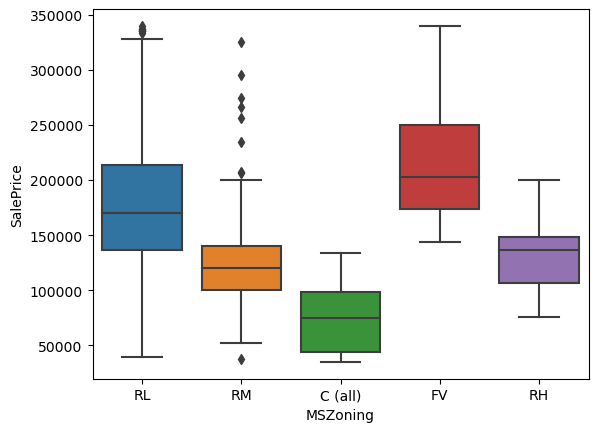

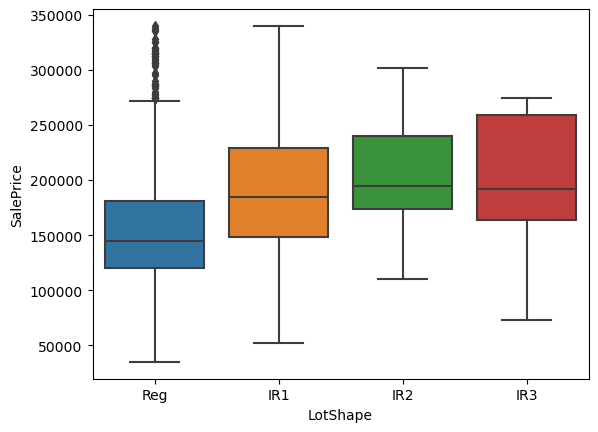

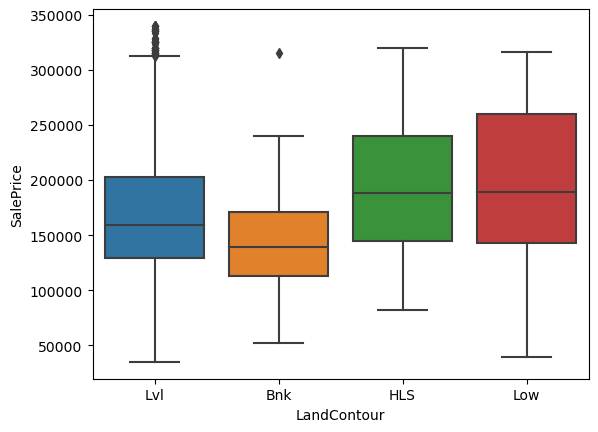

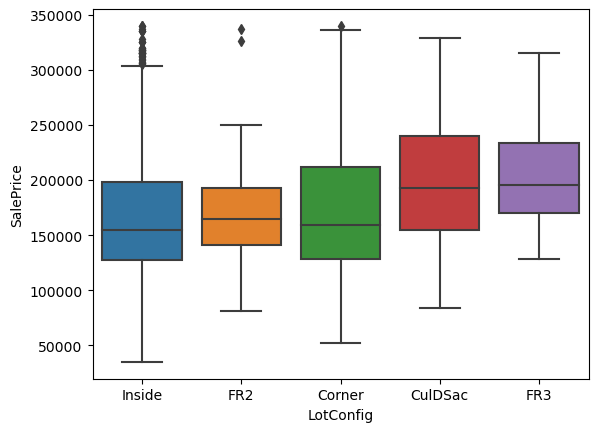

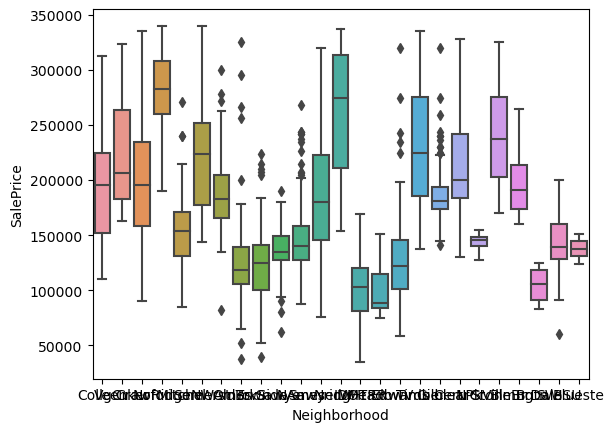

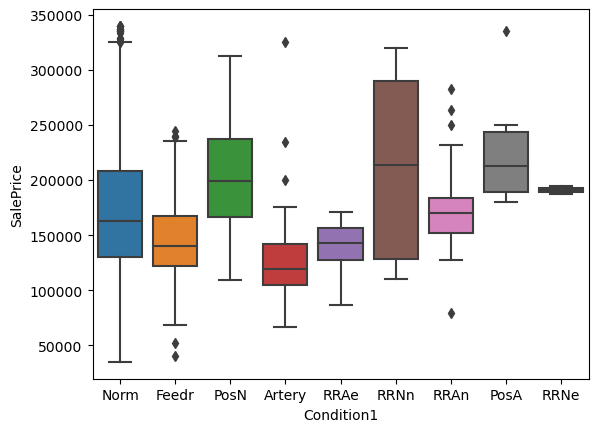

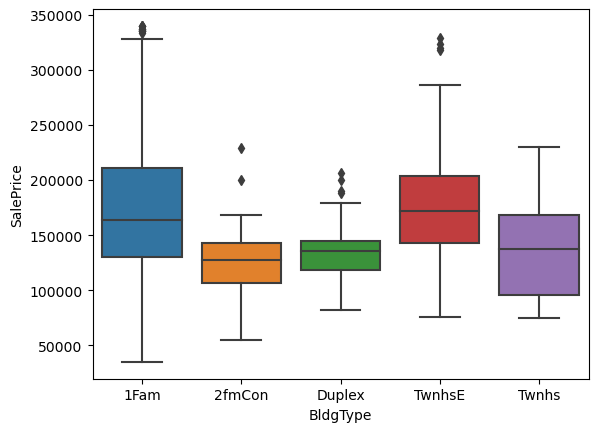

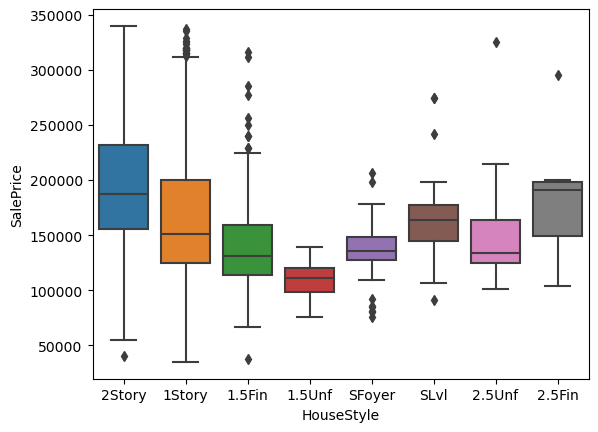

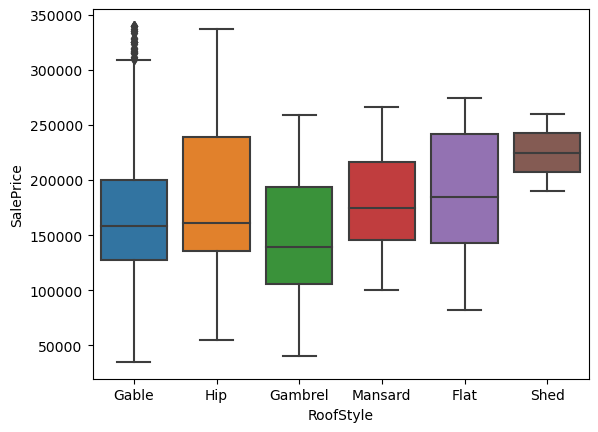

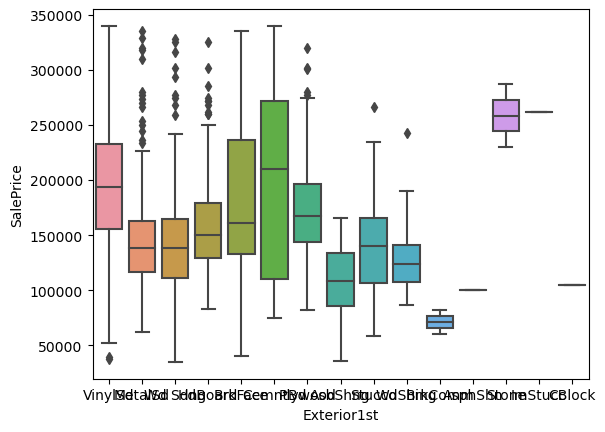

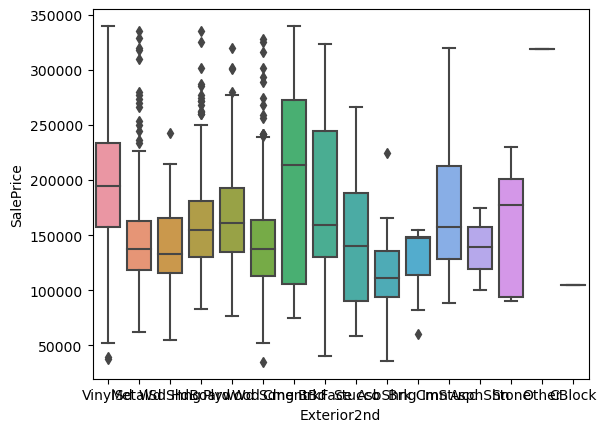

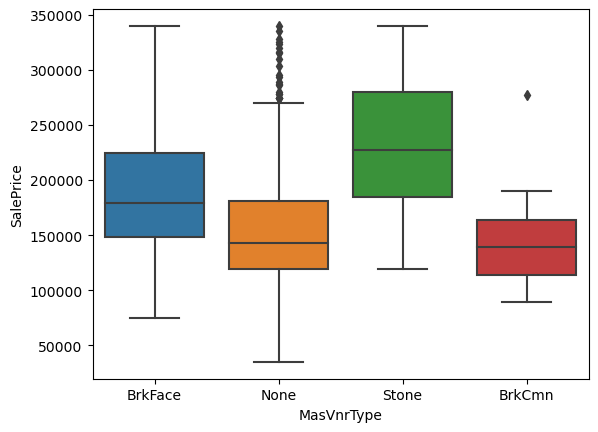

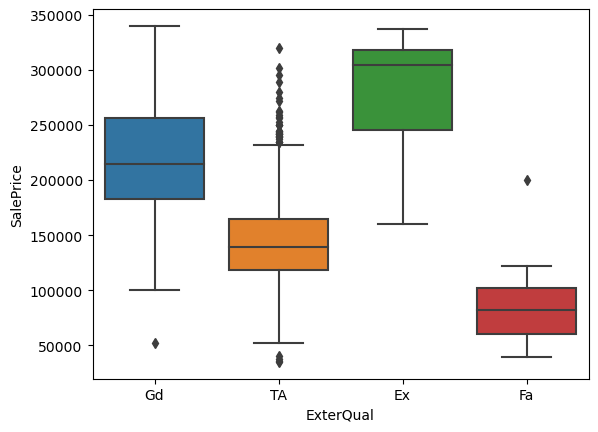

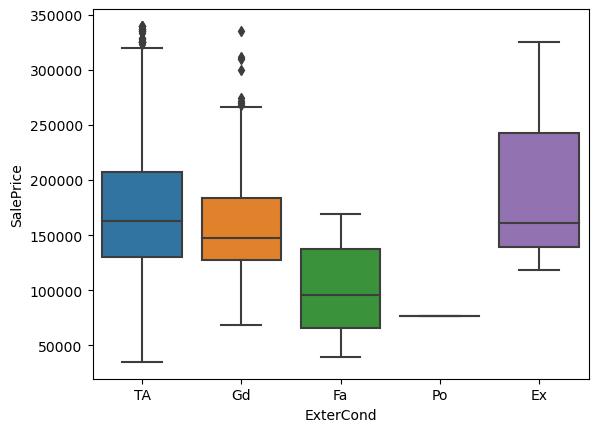

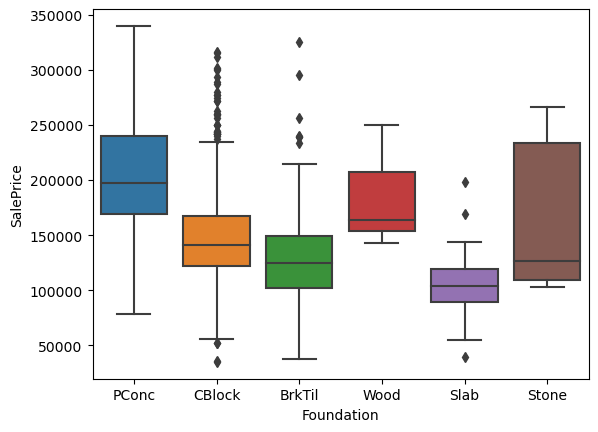

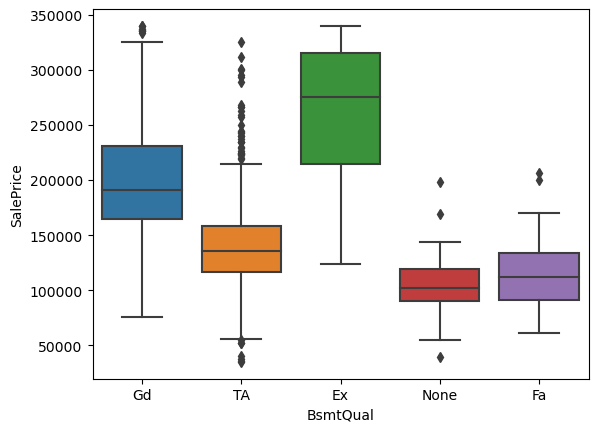

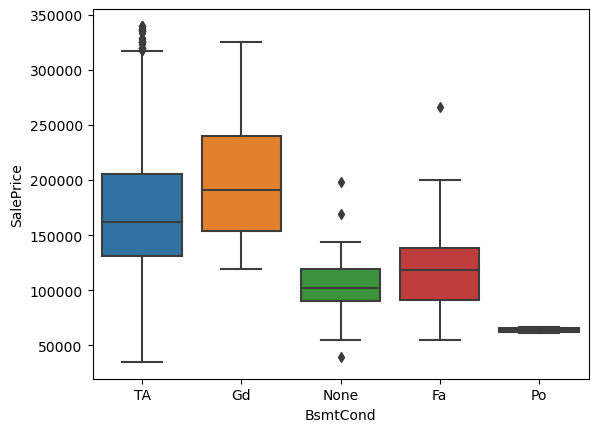

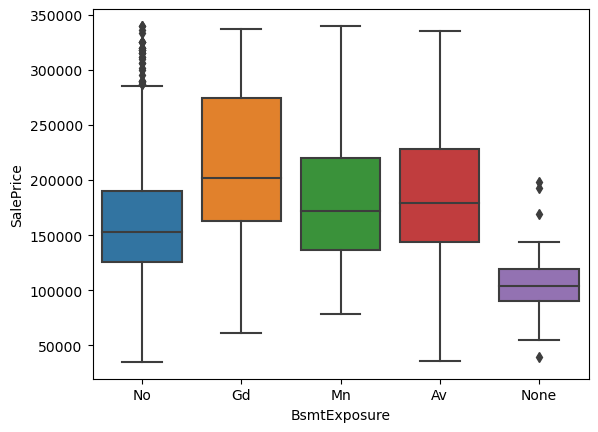

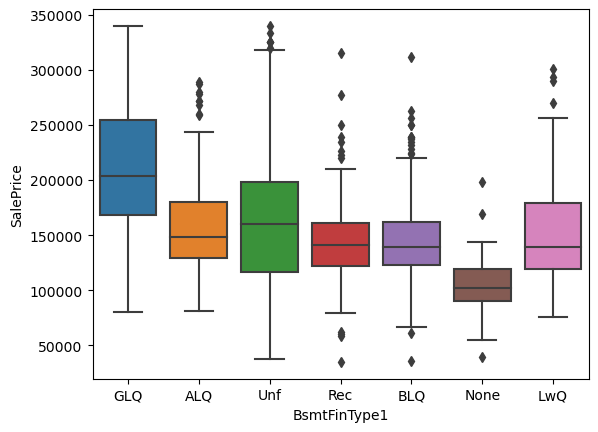

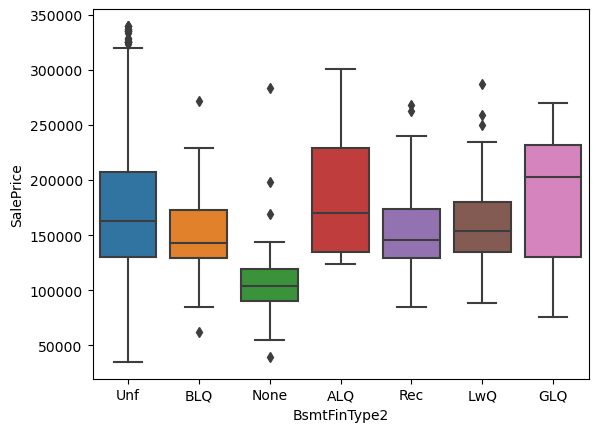

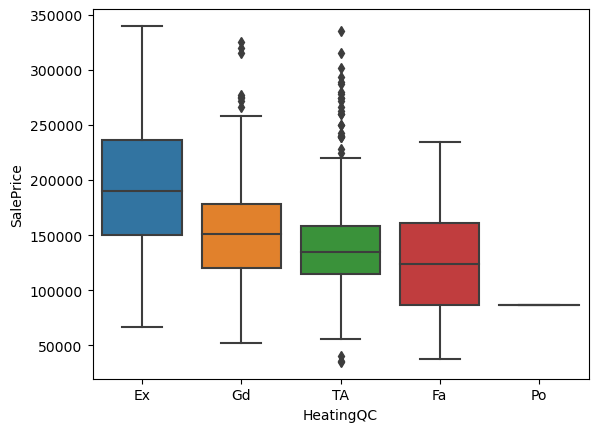

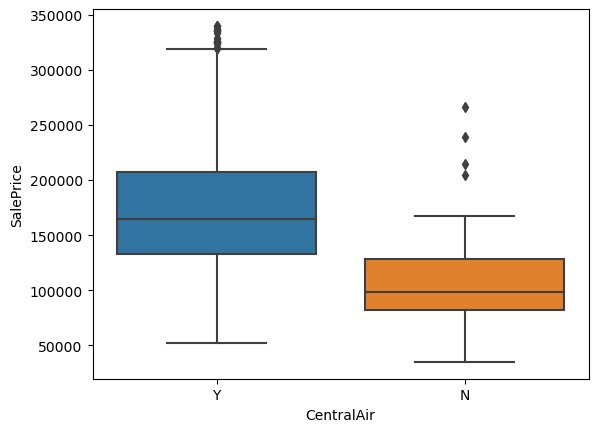

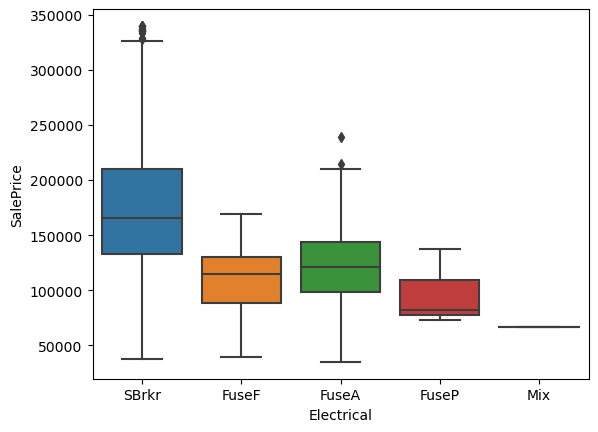

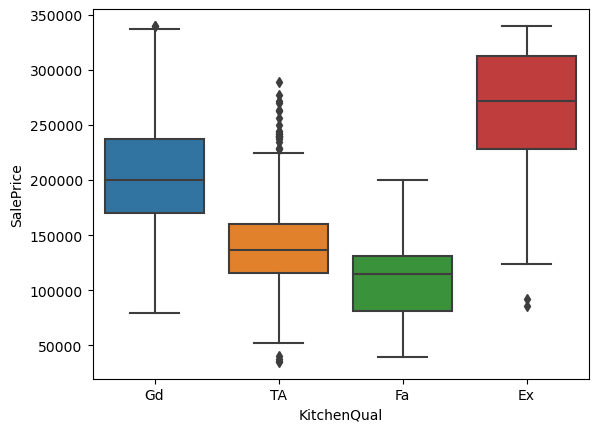

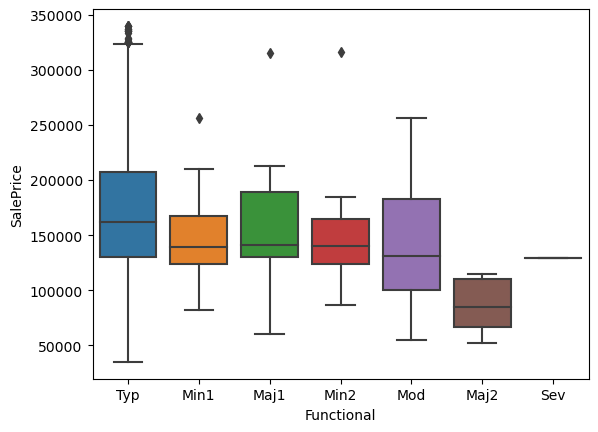

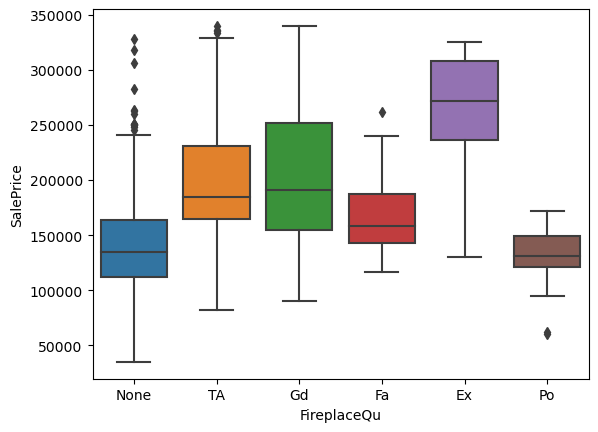

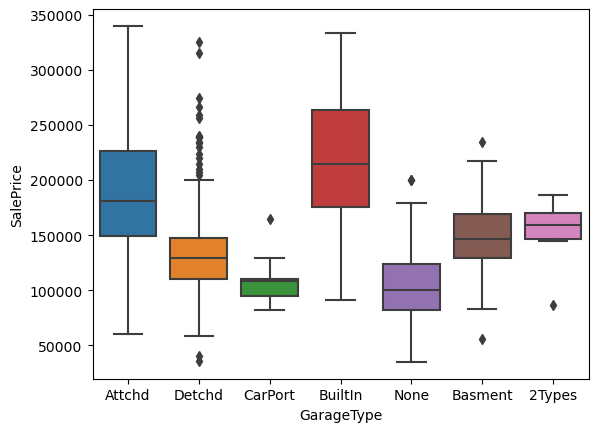

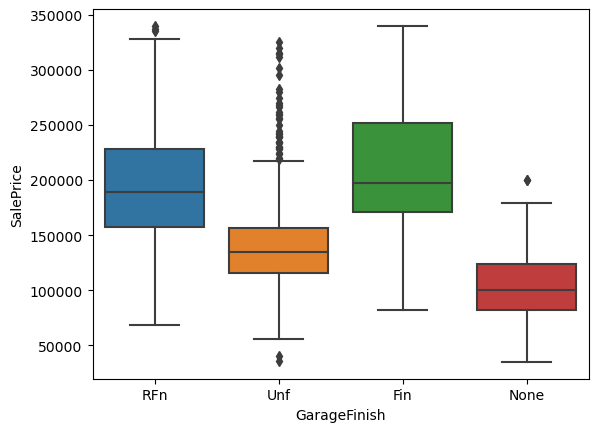

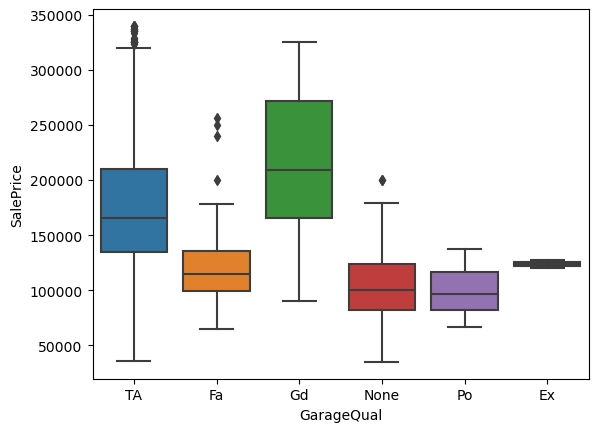

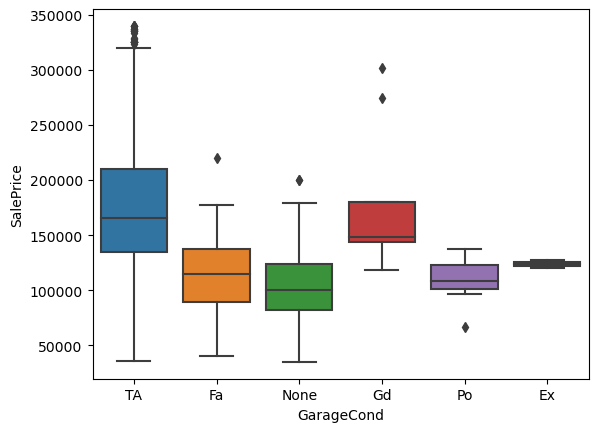

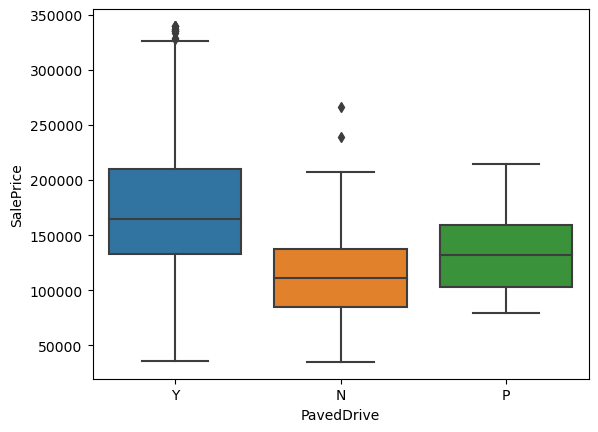

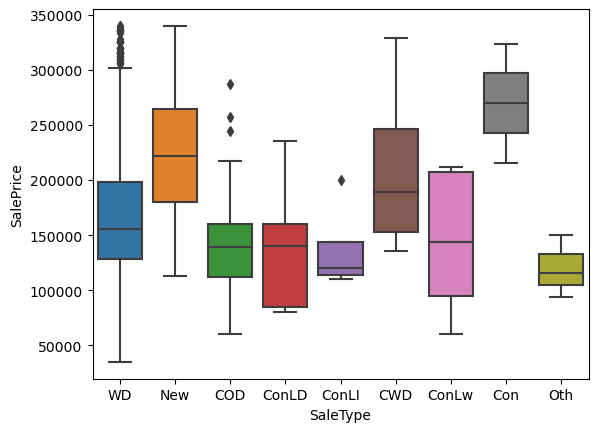

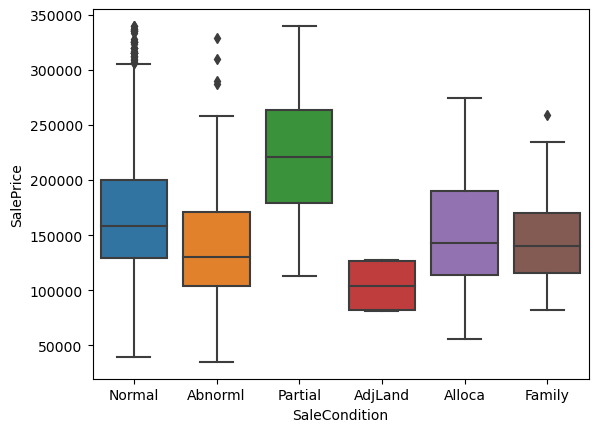

In [34]:
#Sale Price vs Numerical Columns
for i in df_cat_new.columns.values:
    sns.boxplot(data = df, x=i,y= 'SalePrice')
    plt.show()

### Multivariate Analysis

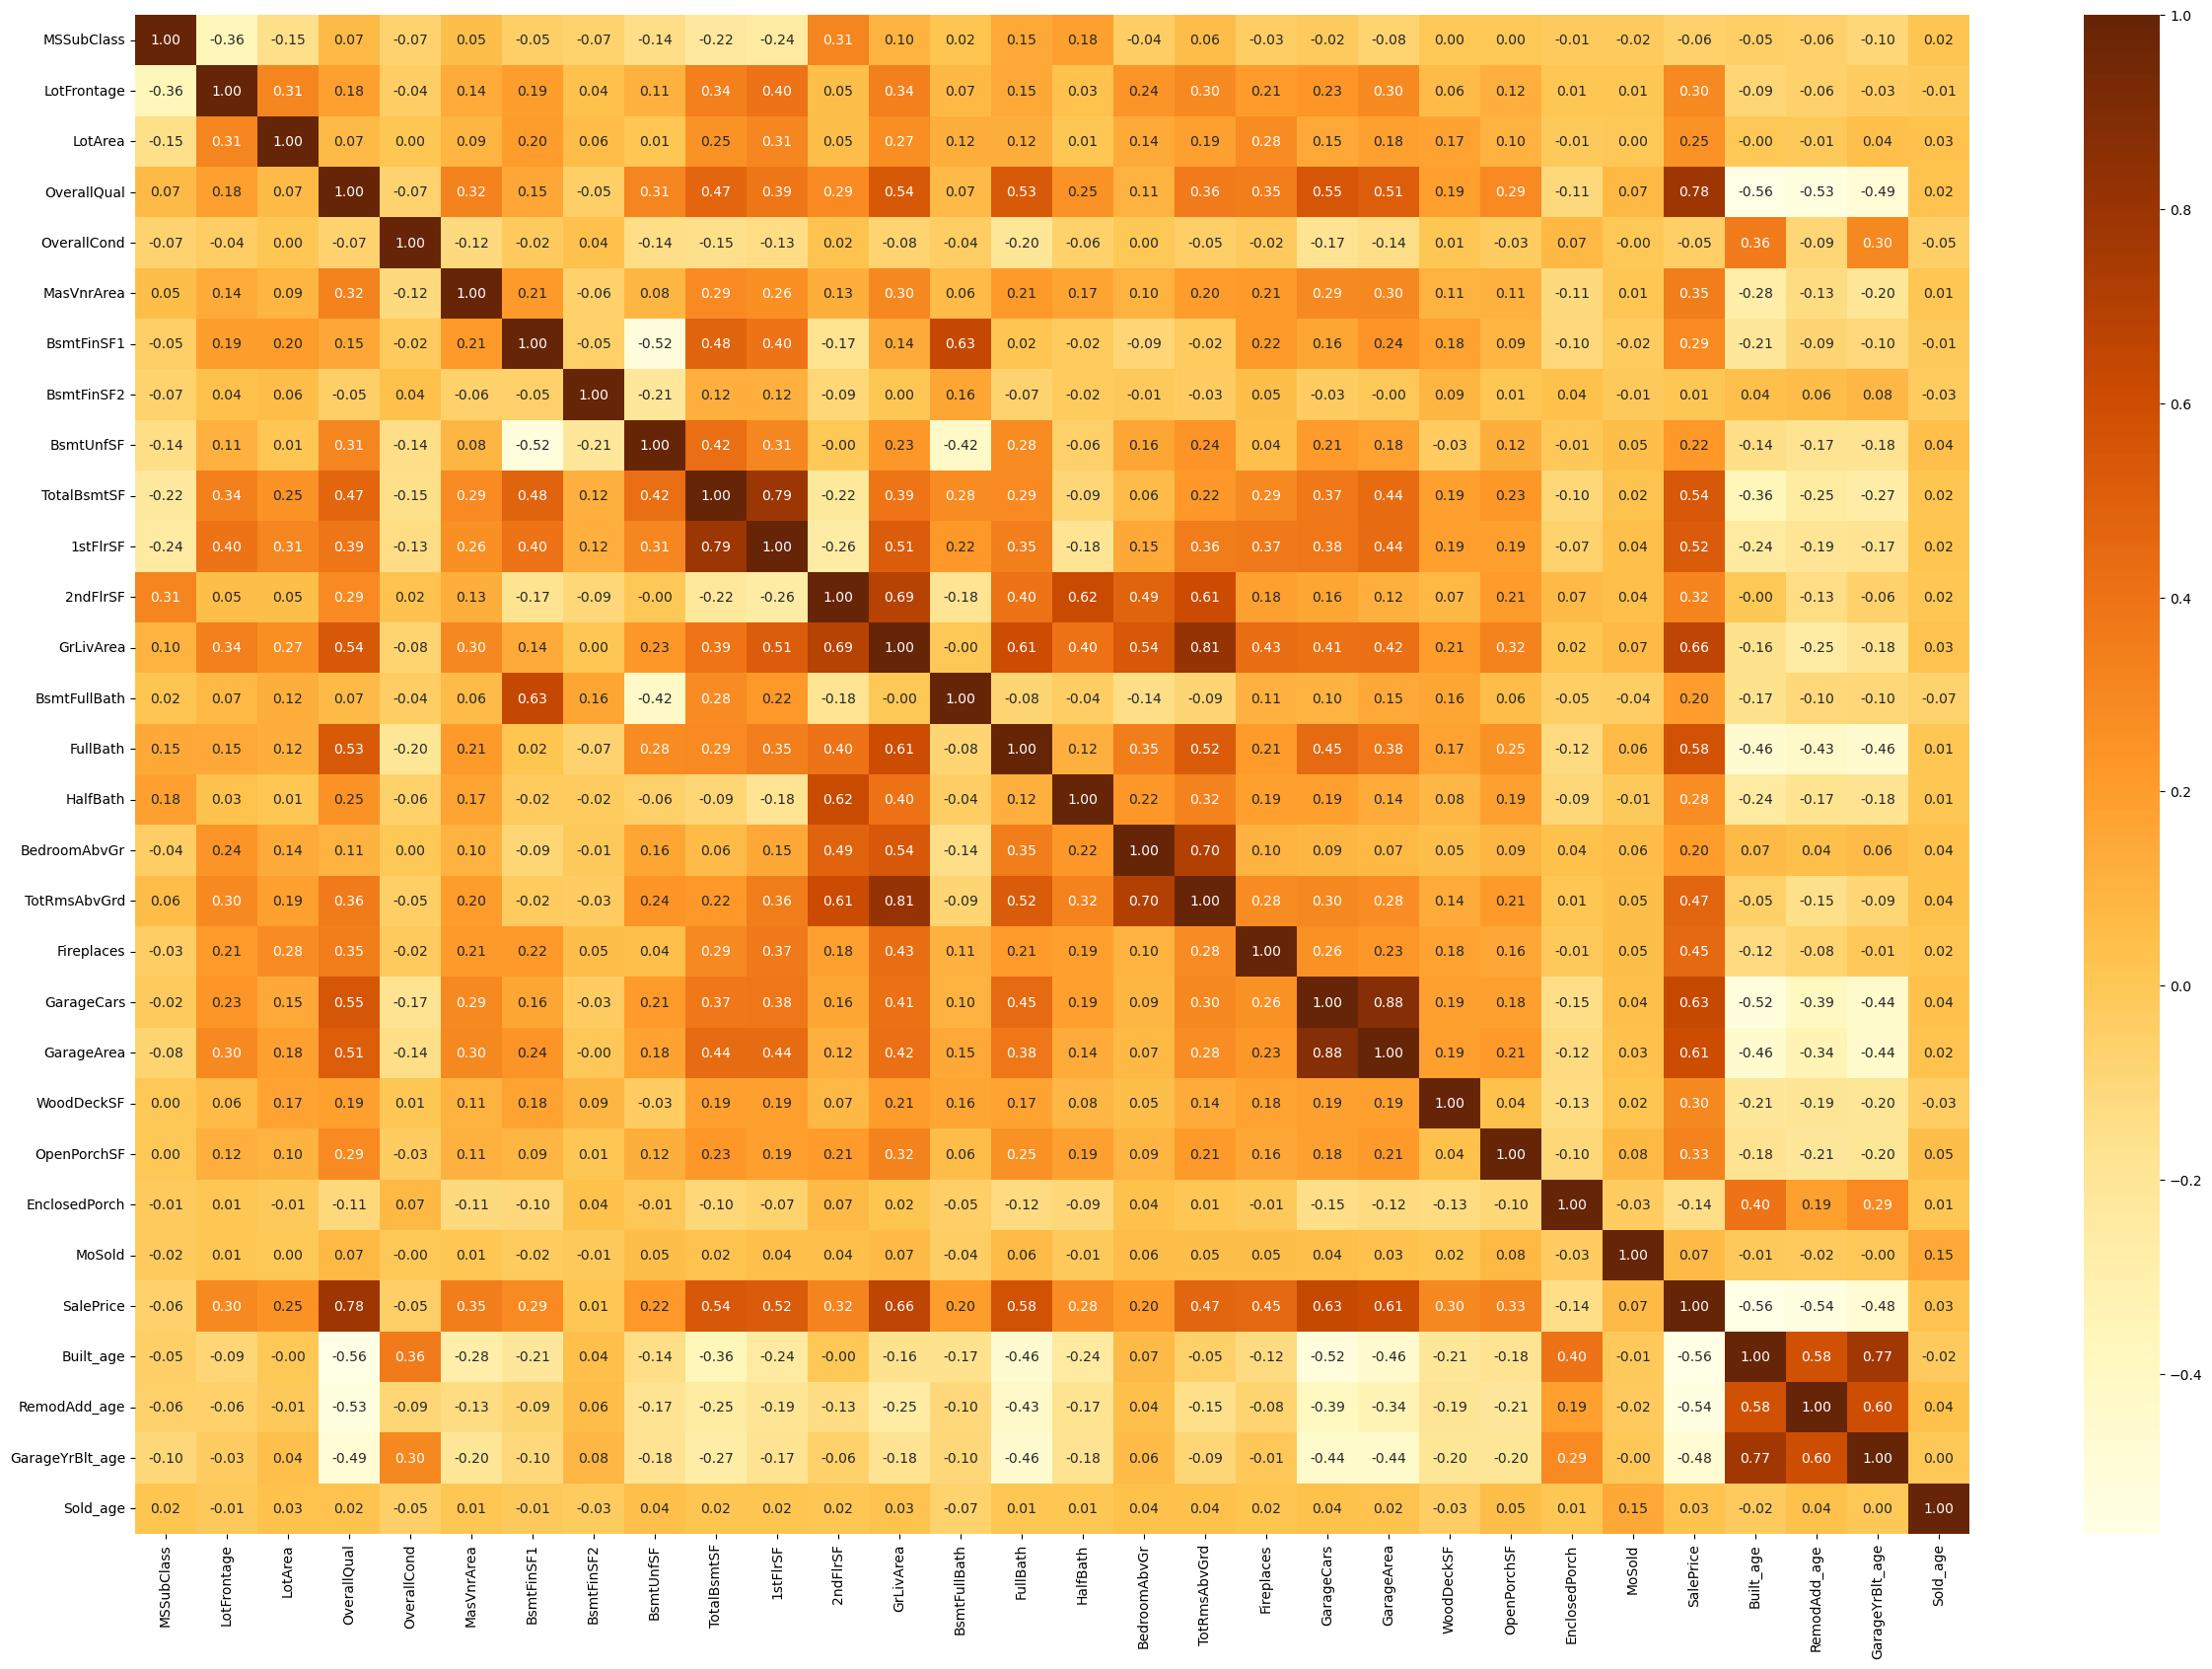

In [35]:
plt.figure(figsize=(30,20))
sns.heatmap(df_cont_new.corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

### create Dummies 

In [36]:
df_dummies = pd.get_dummies(df_cat_new, drop_first=True,dtype=int)

In [37]:
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,...,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [38]:
df_dummies.shape

(1399, 187)

In [39]:
df.drop(df_cat_new.columns, axis=1, inplace=True)

In [40]:
df = pd.concat([df, df_dummies], axis=1)

In [41]:
df.shape

(1399, 217)

In [42]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

### Split Data into train and test 

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(979, 216)
(979,)
(420, 216)
(420,)


In [45]:
Cont_Cols = X_train.select_dtypes(include=['int64', 'float64']).columns

### Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[Cont_Cols] = scaler.fit_transform(X_train[Cont_Cols])
X_test[Cont_Cols] = scaler.transform(X_test[Cont_Cols])

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [48]:
lm.coef_

array([-2.35765717e+03, -4.39640147e+04,  2.74794708e+04,  6.01696460e+04,
        2.80131497e+04, -1.23746031e+04, -1.13765892e+17, -2.97113617e+16,
       -4.11605160e+16,  1.23159037e+17,  4.83700000e+03,  7.39900000e+03,
        1.89492250e+05,  2.11890000e+04,  1.11950000e+04,  2.80000000e+01,
        2.32430000e+04,  1.02875000e+04,  1.35520000e+04,  3.49872500e+04,
        1.62315000e+04,  1.76655000e+04,  1.44537500e+04,  6.07825000e+03,
       -2.12000000e+02, -1.48080000e+04, -7.83800000e+03,  1.43590000e+04,
        1.59600000e+03,  4.09430000e+04,  3.56710000e+04,  3.83565000e+04,
        3.09560000e+04,  5.40125000e+03, -3.51127500e+04, -1.57400000e+03,
        2.14372500e+04,  2.51545000e+04,  1.37120000e+04, -3.10000000e+02,
       -1.33090000e+04, -1.97047500e+04, -2.78400000e+03, -3.83916335e+15,
        6.25050000e+03, -1.08950000e+04, -1.16450000e+03, -6.30000000e+03,
        5.68100000e+03, -2.25150000e+04, -7.16600000e+03, -1.04755000e+04,
       -3.03570000e+04, -

In [49]:
y_pred_train_lr = lm.predict(X_train)
y_pred_test_lr = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lr)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train - y_pred_train_lr))
print(f"Train RSS score is : {rss_train_lr}")
metric.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test_lr))
print(f"Test RSS score is : {rss_test_lr}")
metric.append(rss_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9017648099080386
Test r2 score is : -2.9680119755723957e+21
Train RSS score is : 348181849011.0973
Test RSS score is : 4.0163472188535084e+33
Train MSE score is : 355650509.7151147
Test MSE score is : 9.562731473460734e+30


### Ridge Regression

In [50]:
# list of alphas to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [51]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
print(model_cv.best_params_)

{'alpha': 3.0}


In [53]:
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.44820796e+04 -1.12347140e+04  1.02900292e+04  5.31074298e+04
  2.41229806e+04 -6.04239948e+03  4.94272486e+03  7.98236226e+03
  1.06165498e+04  1.00395640e+04  3.00772392e+04  3.62669578e+04
  3.88026654e+04  2.01392270e+04  1.98511149e+04  3.19852858e+03
  1.78110063e+04  2.50569273e+04  1.17264364e+04  2.74751970e+04
  2.00119275e+04  1.81575408e+04  1.09726317e+04  3.83253472e+03
  4.74548624e+02 -5.65508051e+03 -1.03640709e+04  7.58800941e+03
  2.27237604e+03  1.29669780e+04  9.76188737e+03  1.36247263e+04
  5.27546191e+03  3.62143498e+03 -2.04500828e+04 -2.28987603e+03
  1.07282197e+04  1.33072399e+04  7.26062237e+03  3.58728483e+03
 -1.01761866e+04 -8.81663205e+03 -2.58953984e+03  0.00000000e+00
  6.23579448e+03 -4.08998659e+03  6.34214797e+03 -5.73711039e+03
  1.14145490e+04 -1.64038319e+04 -8.59076935e+03 -8.94392563e+03
 -1.86990638e+04 -1.07205898e+04 -9.77653149e+03 -4.97539313e+03
 -7.28468230e+03  2.41256932e+04  2.51486697e+04 -1.13866571e+04
 -7.40602560e+03 -7.57559

In [54]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
MSSubClass,-14482.08
LotFrontage,-11234.71
LotArea,10290.03
OverallQual,53107.43
OverallCond,24122.98
...,...
SaleCondition_AdjLand,6372.90
SaleCondition_Alloca,2837.91
SaleCondition_Family,3682.26
SaleCondition_Normal,8842.28


In [55]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train}")
metric_r.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test}")
metric_r.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss_train}")
metric_r.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss_test}")
metric_r.append(rss_test)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8919222683046434
Test r2 score is : 0.873890661091263
Train RSS score is : 383067457022.14374
Test RSS score is : 170652577134.5244
Train MSE score is : 391284430.05326223
Test MSE score is : 406315659.8441057


### Lasso Regression

In [56]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
print(model_cv.best_params_)

{'alpha': 100}


In [58]:
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-1.91030549e+04 -0.00000000e+00  0.00000000e+00  8.40360285e+04
  2.58999561e+04 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.53259445e+03  0.00000000e+00  0.00000000e+00  1.56347968e+04
  1.22595490e+05  2.09683087e+04  1.49291730e+04  0.00000000e+00
  2.16351969e+02  2.60641440e+04  6.16577838e+03  3.36951593e+04
  6.96393966e+03  1.87940033e+04  5.97426020e+03  0.00000000e+00
 -0.00000000e+00 -3.37806653e+03 -9.25904087e+03 -0.00000000e+00
  8.47287888e+02  4.38726293e+03  0.00000000e+00  8.90440002e+03
 -2.46146970e+02  2.90778097e+02 -1.72037134e+04 -2.66217108e+03
  3.87260440e+03  9.62933379e+03  2.10387911e+03  4.16202182e+03
 -5.09359695e+03 -0.00000000e+00 -1.41978151e+03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.19340059e+03 -0.00000000e+00
  1.43442523e+04 -9.14741010e+03 -2.42654035e+03 -0.00000000e+00
 -2.28880487e+03 -1.49208743e+03 -3.46187757e+03 -0.00000000e+00
 -0.00000000e+00  2.34088014e+04  2.84739752e+04 -4.49195736e+03
 -8.69886281e+02 -0.00000

In [59]:
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

metric_l = []
r2_train_l = r2_score(y_train, y_pred_train_l)
print(f"Train r2 score is : {r2_train_l}")
metric_l.append(r2_train_l)

r2_test_l = r2_score(y_test, y_pred_test_l)
print(f"Test r2 score is : {r2_test_l}")
metric_l.append(r2_test_l)

rss_train_l = np.sum(np.square(y_train - y_pred_train_l))
print(f"Train RSS score is : {rss_train_l}")
metric_l.append(rss_train_l)

rss_test_l = np.sum(np.square(y_test - y_pred_test_l))
print(f"Test RSS score is : {rss_test_l}")
metric_l.append(rss_test_l)

mse_train_l = mean_squared_error(y_train, y_pred_train_l)
print(f"Train MSE score is : {mse_train_l}")
metric_l.append(mse_train_l**0.5)

mse_test_l = mean_squared_error(y_test, y_pred_test_l)
print(f"Test MSE score is : {mse_test_l}")
metric_l.append(mse_test_l**0.5)

Train r2 score is : 0.8788456074154787
Test r2 score is : 0.8805656160741251
Train RSS score is : 429415980021.0628
Test RSS score is : 161619952905.90402
Train MSE score is : 438627150.1747322
Test MSE score is : 384809411.68072385


### Comparision

In [60]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.90,0.89,0.88
1,R2 Score (Test),-2968011975572395655168.00,0.87,0.88
2,RSS (Train),348181849011.10,383067457022.14,429415980021.06
3,RSS (Test),4016347218853508362767899211857920.00,170652577134.52,161619952905.90
4,MSE (Train),18858.70,19780.91,20943.43
5,MSE (Test),3092366646027074.00,20157.27,19616.56


In [61]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)



In [62]:
betas.sort_values(by=['Ridge'])

,Linear,Ridge,Lasso
LotShape_IR3,-35112.75,-20450.08,-17203.71
BsmtQual_TA,-24070.00,-18930.54,-11556.19
Neighborhood_MeadowV,-30357.00,-18699.06,-2288.80
BsmtQual_Fa,-22935.00,-18091.39,-10669.68
BldgType_Twnhs,-30992.00,-17372.55,-8943.04
KitchenQual_TA,-20334.00,-16956.67,-10603.72
Neighborhood_Edwards,-22515.00,-16403.83,-9147.41
BsmtQual_Gd,-18587.00,-14549.10,-8481.60
MSSubClass,-2357.66,-14482.08,-19103.05
KitchenQual_Gd,-17276.00,-12576.29,-5966.01


In [63]:
betas.sort_values(by=['Lasso'])

,Linear,Ridge,Lasso
BsmtExposure_None,-20811.50,-9453.74,-19438.98
MSSubClass,-2357.66,-14482.08,-19103.05
LotShape_IR3,-35112.75,-20450.08,-17203.71
BsmtQual_TA,-24070.00,-18930.54,-11556.19
BsmtQual_Fa,-22935.00,-18091.39,-10669.68
KitchenQual_TA,-20334.00,-16956.67,-10603.72
Exterior2nd_Wd Shng,-1177.75,-7810.23,-10104.52
RemodAdd_age,-7838.00,-10364.07,-9259.04
Neighborhood_Edwards,-22515.00,-16403.83,-9147.41
BldgType_Twnhs,-30992.00,-17372.55,-8943.04


### Analyis for Subjective Questions 

### Question 1

In [64]:
# if alpha is doubled
alpha_old = 3.0

alpha_new = 6.0
ridge_new = Ridge(alpha=alpha_new)
ridge_new.fit(X_train, y_train)
print(ridge_new.coef_)

[-1.42957727e+04 -4.27851172e+03  7.78287904e+03  4.48585827e+04
  2.12026544e+04 -2.44961422e+03  5.70551402e+03  6.16893588e+03
  1.12524088e+04  1.05192065e+04  2.31609176e+04  3.14631259e+04
  3.06626860e+04  1.83461038e+04  2.04635798e+04  3.83516040e+03
  1.62397692e+04  2.45643990e+04  1.04953780e+04  2.46327453e+04
  1.97854312e+04  1.72034707e+04  1.05302588e+04  3.04571160e+03
  8.50336147e+02 -4.23567701e+03 -1.13224825e+04  4.12561992e+03
  2.15072792e+03  9.38678611e+03  6.16335757e+03  1.02842923e+04
  6.54646836e+02  3.12465008e+03 -1.34026331e+04 -2.62558356e+03
  7.48760705e+03  9.87916744e+03  5.33044164e+03  4.19982348e+03
 -8.76543561e+03 -5.07938423e+03 -2.46734367e+03  0.00000000e+00
  4.93547891e+03 -2.63667394e+03  7.15039577e+03 -6.56929348e+03
  1.14882671e+04 -1.48294532e+04 -1.02431822e+04 -7.72073089e+03
 -1.50055682e+04 -8.92640715e+03 -8.95654489e+03 -3.59418969e+03
 -5.80329125e+03  2.06941886e+04  2.23928209e+04 -8.49869343e+03
 -5.71003772e+03 -7.06206

In [66]:
df_ridge2 = pd.DataFrame(index=X_train.columns)
df_ridge2.rows = X_train.columns
df_ridge2['Ridge'] = ridge_new.coef_
df_ridge2.sort_values(by = ['Ridge'])

,Ridge
BsmtQual_TA,-16458.99
KitchenQual_TA,-15708.08
BldgType_Twnhs,-15219.10
BsmtQual_Fa,-15128.53
Neighborhood_MeadowV,-15005.57
Neighborhood_Edwards,-14829.45
MSSubClass,-14295.77
LotShape_IR3,-13402.63
BsmtQual_Gd,-12352.53
RemodAdd_age,-11322.48


In [67]:
alpha2 = 200
lasso2 = Lasso(alpha=alpha2)
lasso2.fit(X_train, y_train)
print(lasso2.coef_)

df_lasso2 = pd.DataFrame(index=X_train.columns)
df_lasso2.rows = X_train.columns
df_lasso2['Lasso'] = lasso2.coef_
df_lasso2.sort_values(by = ['Lasso'])

[-1.96456958e+04 -0.00000000e+00  0.00000000e+00  9.26199577e+04
  1.91706984e+04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.41657598e+03
  1.11091496e+05  1.85131455e+04  1.37335691e+04  0.00000000e+00
  0.00000000e+00  2.61532709e+04  0.00000000e+00  3.23556612e+04
  1.01246000e+04  1.79467704e+04  4.31872669e+03 -0.00000000e+00
  0.00000000e+00 -1.29220088e+03 -1.07260706e+04 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.32595447e+03
 -6.81850362e+03  0.00000000e+00 -0.00000000e+00 -3.43997548e+03
  0.00000000e+00  4.65815433e+03  0.00000000e+00  3.75691179e+03
 -4.97430994e+02 -0.00000000e+00 -5.26285308e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.40065141e+03 -7.58293746e+02
  9.63823461e+03 -8.02599980e+03 -3.26563467e+03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.11047293e+03 -0.00000000e+00
 -0.00000000e+00  1.71894673e+04  2.42773511e+04 -2.84274372e+03
 -0.00000000e+00 -0.00000

,Lasso
MSSubClass,-19645.70
FireplaceQu_None,-11781.83
RemodAdd_age,-10726.07
KitchenQual_TA,-9097.14
Neighborhood_Edwards,-8026.00
Exterior2nd_Wd Shng,-7369.24
BsmtExposure_None,-7222.01
MSZoning_RM,-6818.50
BsmtQual_TA,-4761.38
BldgType_Twnhs,-4610.90


In [ ]:
Neighborhood_NridgHt	24277.35
TotRmsAbvGrd	26153.27
GarageCars	32355.66
OverallQual	92619.96
GrLivArea	111091.50


TotRmsAbvGrd	10287.50	25056.93	26064.14
Neighborhood_NridgHt	27297.00	25148.67	28473.98
GarageCars	34987.25	27475.20	33695.16
OverallQual	60169.65	53107.43	84036.03
GrLivArea

### Question 3

In [71]:
Top_5_lasso = [ 'GrLivArea', 'OverallQual' , 'GarageCars', 'Neighborhood_NridgHt', 'TotRmsAbvGrd']

In [72]:
X_train = X_train.drop(Top_5_lasso, axis=1)
X_test = X_test.drop(Top_5_lasso, axis=1)

In [73]:
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [74]:
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
print(model_cv.best_params_)

{'alpha': 50}


In [76]:
alpha = 50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)


[-1.87852431e+04 -2.19047224e+02  0.00000000e+00  3.19605257e+04
 -7.84560684e+02 -0.00000000e+00  3.79752106e+03  1.24441332e+04
  0.00000000e+00  1.27428124e+05  7.36268722e+04  2.29817755e+04
  1.83516626e+04  0.00000000e+00  2.63136055e+04  1.07250459e+04
  4.56086736e+04  1.78519967e+04  7.48705803e+03  0.00000000e+00
  6.96747886e+02 -1.42417410e+04 -1.08638326e+04  0.00000000e+00
  2.85715649e+03  8.03410434e+03  3.39100034e+02  8.16395310e+03
  0.00000000e+00  2.00875732e+03 -4.58465066e+04 -2.12060886e+03
  7.66938848e+03  1.00598478e+04  6.14954476e+03  5.10165474e+03
 -5.87829089e+03 -0.00000000e+00 -1.00124665e+03  0.00000000e+00
  0.00000000e+00 -9.51055514e+03  1.12153658e+01 -1.35115313e+04
  4.69907521e+03 -2.51115522e+04 -1.34301469e+04 -1.56645603e+04
 -2.90724638e+04 -1.75388299e+04 -1.69592579e+04 -2.26958469e+03
 -1.21708898e+04  1.46161910e+04 -1.45921601e+04 -1.24865085e+04
 -1.58010375e+04 -3.78865938e+03  5.39176653e+03  1.48490119e+04
 -0.00000000e+00  1.02088

In [77]:
df_lasso3 = pd.DataFrame(index=X_train.columns)
df_lasso3.rows = X_train.columns
df_lasso3['Lasso'] = lasso.coef_
df_lasso3.sort_values(by = ['Lasso'])

,Lasso
LotShape_IR3,-45846.51
Neighborhood_MeadowV,-29072.46
Neighborhood_Edwards,-25111.55
BsmtQual_Fa,-24281.35
BsmtQual_TA,-23142.39
KitchenQual_TA,-22517.56
BsmtExposure_None,-21575.40
MSSubClass,-18785.24
KitchenQual_Fa,-18557.43
KitchenQual_Gd,-18323.58
